# Сборный проект - исследование закономерностей, определяющих успешность компьютерных игр. 

Мы работаем в интернет-магазине "Стримчик", который продаёт компьютерные игры по всему миру. Нам доступны исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах.  

-----------
**Цель исследования**

Необходимо выявить определяющие успешность игры закономерности для планирования рекламной кампании на будущее.  

-------------
**Исходные данные**
Данные представлены до 2016 года, кампанию нужно спланировать на 2017 год.  

-----
**Задачи исследования** 

Для выполнения поставленной задачи нужно будет выполнить несколько шагов:  

***Шаг 1. Изучение общей информации*** 

* [Анализ датафрейма, изучение предоставленых данных и поиск в них проблемных мест](#Шаг-1.-Загрузка-данных ) 

***Шаг 2. Предобработка данных***
* [1. Переименование столбцов.](#Переименование-столбцов)
* [2. Устранение пропусков](#Устранение-пропусков)
* [3. Приведение данных к нужному типу](#Приведение-данных-к-нужному-типу) 
* [4. Подсчёт суммарных продаж во всех регионах](#Суммарные-продажи-во-всех-регионах)

***Шаг 3. Исследовательский анализ***
* [1. Анализ количества игр, выпускаемых в разные годы](#Количество-игр,-выпускаемых-в-разные-годы)
* [2. Изменение продаж по платформам](#Изменение-продаж-по-платформам)
* [3. "Ящик с усами" по глобальным продажам](#Пострим-"ящик-с-усами"-по-глобальным-продажам-игр-с-разбивкой-по-платформам)
* [4. Влияние отзывов пользователей и критиков на продажи](#Влияние-отзывов-пользователей-и-критиков-на-продажи-на-примере-платформы-PS3)
* [5. Связь между отзывами и продажами](#Проверим,-существует-ли-связь-между-отзывами-и-продажами-на-примере-других-популярных-платформ)
* [6. Распрелеление игр по жанрам](#Распределение-игр-по-жанрам)

***Шаг 4. Составление портретов пользователя каждого региона***
* [1. Северная Америка](#Регион-Северная-Америка-(NA))
* [2. Европа](Регион-Европа-(Eu))
* [3. Япония](Решгон-Япония-(Jp))

***Шаг 5. проверка гипотез***
* [1.Средние пользовательские рейтинги платформ Xbox и PC одинаковые](#Проверка-гипотезы,-что-средние-пользовательские-рейтинги-платформ-Xbox-и-PC-одинаковые)
* [2.Средние пользовательские рейтинги жанров Action и Sports разные](#Проверка-гипотезы,-что-средние-пользовательские-рейтинги-жанров-Action-и-Sports-разные)

***Шаг 6. Составление общего вывода***
* [Вывод](#Шаг-6.-Общий-вывод:)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom
from math import sqrt

#### Шаг 1. Загрузка данных

In [2]:
games = pd.read_csv('/datasets/games.csv')
display(games.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Среднее значение в году выпуска показывает нам, что большинство игр были выпущены в 2006 году. Половина всех игр была выпущена до 2007 года, а 75% всех игр - до 2010.   
Средние продажи в Северной Америке составляют 0,26 млн. копий - в среднем игры продавались в таком количестве. Но есть и нулевые продажи - значит, какие-то игры не продавались совсем. Самые успешные игры продавались в количестве 41,36 млн. копий. Медиана в 0,08 млн. копий показывает, что половина игр имеет небольшие продажи.  
В Европе средние продажи 0,14 млн.копий - меньше, чем в Северной Америке. Самые успешные игры продавались в количестве 28,96 млн. копий, но также есть  и игры, которые не продавались совсем. Половина игр имеет продажи 0,02 млн. копий (небольшие продажи, меньше, чем в Северной Америке).  
В Японии средние продажи - 0,08 млн. копий, что меньше значений и в Северной Америке, и в Европе. Медиана - 0 млн. копий означает, что половина игр имеет крайне низкие или отсутствующие продажи. Максимальные продажи - 10, 22 млн. копий.  
В других регионах средние продажи - 0,05 млн. копий. Медиана - 0,01 млн. копий, что означает, что половина игр имеет очень низкие продажи в остальных регионах. А самые успешные игры продавались в количестве 10,57 млн.  копий (больше, чем максимальное значение в Японии).  
Средний рейтинг критиков составляет 68,96 баллов - что соответствует достаточно высоким оценкам критиков. Медиана выше среднего значения (71 балл) показывает, что половина игр в среднем имеет такую оценку (достаточно хорошу). Минимальное значение - 13 баллов (крайне низкий рейтинг), а максимальное - 98 баллов.  

В целом можно сказать, что Северная Америка является крупнейшим рынком для игр, с более высокими средними и максимальными продажами, чем в Европе, Японии и других регионах. В Европе продажи немного ниже, а в Японии - половина игр - с очень низкими продажами. Средеий рейтинг игр - 68,96 баллов, что показывает довольно хорошие оценки игр. 

In [5]:
print('Количество явных дубликатов в датафрейме:', games.duplicated().sum())

Количество явных дубликатов в датафрейме: 0


In [6]:
print(games[games.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)])

                Name Platform  Year_of_Release   Genre  NA_sales  EU_sales  \
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
659              NaN      GEN           1993.0     NaN      1.78      0.53   
14244            NaN      GEN           1993.0     NaN      0.00      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       JP_sales  Other_sales  Critic_Score User_Score Rating  
604        0.00         0.23          83.0        5.5      E  
659        0.00         0.08           NaN        NaN    NaN  
14244      0.03         0.00           NaN        NaN    NaN  
16230      0.00         0.00          83.0        5.5      E  


In [7]:
games = games.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release'], keep='first')

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16712 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16444 non-null  float64
 3   Genre            16712 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     8136 non-null   float64
 9   User_Score       10013 non-null  object 
 10  Rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Неявные дубликаты были удалены. В датафрейме осталось 16713 значений.

In [9]:
print(games['Genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [10]:
print(games['Platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


# ***Вывод:***

В датафрейме 16 715 строк и 11 столбцов. В столбцах 'Name', ''Year_of_Release', 'Genre', 'Critic_score', 'User_score' и 'Raiting' присутствуют пропущенные данные. В некоторых столбцах неправильный тип данных. Названия столбцов не соответствуют змеиному регистру. Явных дубликатов в датафрейме не обнаружено. Неявные были обработаны. Данные представлены за период с 1980 по 2016 год.

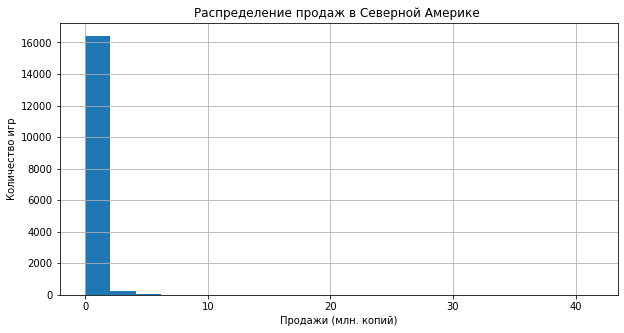

In [11]:
games['NA_sales'].hist(bins=20, figsize=(10,5))
plt.xlabel('Продажи (млн. копий)')
plt.ylabel('Количество игр')
plt.title('Распределение продаж в Северной Америке ');

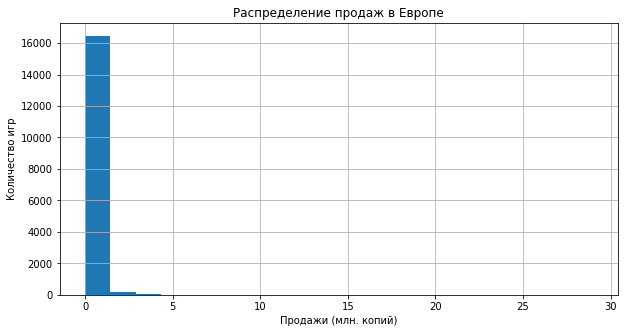

In [12]:
games['EU_sales'].hist(bins=20, figsize=(10,5))
plt.xlabel('Продажи (млн. копий)')
plt.ylabel('Количество игр')
plt.title('Распределение продаж в Европе');

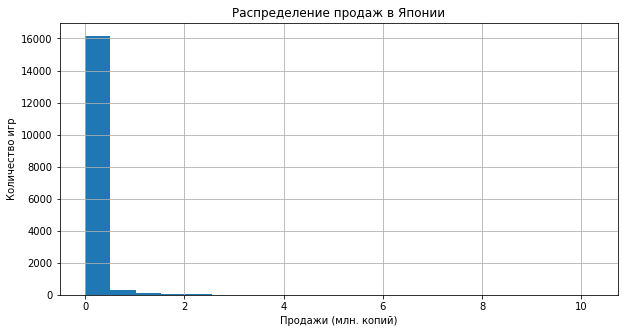

In [13]:
games['JP_sales'].hist(bins=20, figsize=(10,5))
plt.xlabel('Продажи (млн. копий)')
plt.ylabel('Количество игр')
plt.title('Распределение продаж в Японии');

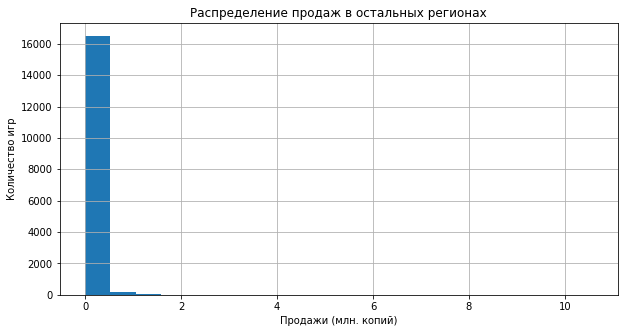

In [14]:
games['Other_sales'].hist(bins=20, figsize=(10,5))
plt.title('Распределение продаж в остальных регионах')
plt.xlabel('Продажи (млн. копий)')
plt.ylabel('Количество игр');

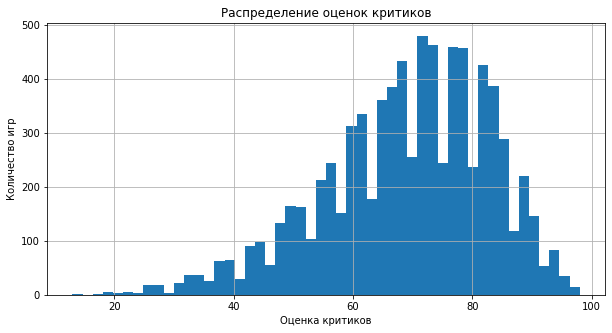

In [15]:
games['Critic_Score'].hist(bins=50, figsize=(10,5))
plt.xlabel('Оценка критиков')
plt.ylabel('Количество игр')
plt.title('Распределение оценок критиков');

На всех графиках с распределением продаж по регионам мы видим большрй пик в районе нуля. Это поквзывает то, что большинство игр продавалась в небольших объёмах.  
На графике распределения оценок критиков видно, что количество игр распределено неравномерно - встречается много пиковых значений. Мало игр, с оценкамии ниже 30 баллов и больше 90.

#### Шаг 2. Предобработка данных

##### Переименование столбцов

In [16]:
#games.columns = ['name','platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 
                 #'other_sales', 'critic_score', 'user_score', 'raiting']

In [17]:
games.columns = games.columns.str.lower()
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


##### Устранение пропусков

In [18]:
games.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Мы видим пропущенные значения в столбцах 'name', 'genre', 'year_of_release', 'critic_score', 'user_score' и 'rating'.
Пропущенные значения предлагаю обработать следующим образом:

* В столбцах ***'name', 'genre'*** и ***'raiting'*** заменить пропущенные значения на 'unknown'. 
* В столбце ***'year_of_release'*** оставить пропуски без изменеия, так как год мы не можем заменить ни средним, ни медианным знвчение. А если удалить строки с пропусками, мы потеряем большое количество данных.
* В столбцах ***'critic_score'*** и ***'user_score'*** также предлагаю отставить пропуски без изменений, так как нет способа корректного заполнения данных для этих столбцов. Поскольку в жтих столбцах представлены данные о рейтинге, будет неправильно заполнять пропуски средним или медианой. Удалить строки с пропущенными значениями тоже юудет некорректно, так как такие строки составля.т большую часть от общего количества строк, и таким образом мы потеряем большое количество данных.  


* Причинами пропусков в столбцах ***'name'*** и ***'genre'*** могут быть:
    - технические ошибки при сборе данных;
    - неполные данные при публикации информации об игре;
    - старые игры (плохая документация или её отсутствие);
    - ошибки при вводе данных;
    - региональные отличия (разные названия для разных стран);
    - неопределённый жанр (не подходит под какой-то один) 


* Причинами, которые привели к пропускам в столбце ***'year_of_release'***, могут быть:
   - отсутствие данных при сборе информации (например, игра выпущена без точной информации о дате выхода);
   - человеческий фактор (ошибки при вводе данных);
   - техническая ошибка;
   - отсутствие официального релиза (игры собирались выйти на рынок в определённое время, но это не удалось сделать, и дата выхода не была указана)
   

* Причинами пропусков в столбцах ***'critic_score'***, ***'user_score'***  могут быть:
    - отсутствие рецензий на игру (некоторые игры, особенно менее популярные или от маленьких компаний могли не получить никаких отзывов);
    - новые игры (ещё не успели оценить);
    - малоизвестные игры;
    - ошибки при вводе данных;
    - ошибки при синхроницации и переносе данных.
    

* Причинами пропусков в столбце ***'rating'*** может быть:
    - отсутствие официального рейтинга (некоторые игры могут не проходить официальную оценку);
    - игры, которые распространяются только через цифровые платформы могут не требовать официального рейтинга);
    - региональные особенности (например, рейтинг не действует в Японии, где игры оцениваются по своему рейтингу);
    - старые игры (которые вышли до того, как был введён официальный рейтинг);
    - ошибки при вводе данных;
    - технические ошибки.
    
    
* TBD - это аббревиатура, которая обозначает "To be determined", то есть то, что рейтинг ещё не объявлен. То есть, фактически, это тоже пропуски. Заменить их нулевыми значениями мы не можем, так как рейтинг пользователей начинается с нуля. Эти значения мы можем отметить как пропущенные, заменив их на NaN.

* В столбцах с оценками экспертов, пользователей и рейтингом может быть много пропусков по нескольким причинам:
   - из-за недостатка данных о старых играх - для более ранних игр оценки рользователей и критиков могли не собираться;
   - некоторые игры (менее известные и игры от маленьких компаний) могут не получать оценки потзователей и критиков;
   - возможно, отзывы собирались не для всех типов платформ;
   - рейтинги не всегда бвыли обязательными (плюс, рейтинг ESRB появился только в 1994 году);
   - в разных странах используются разные системы оценок (разные рейтинги).
   
   
Связь между большим количеством пропусков в столбце с рейтингами и тем, что эти рейтинги выставляет именно Американское агенство, скорее всего, существует. Рейтинги, предоставляемые такими агентствами, как ESRB, могут не охватывать все игры, особенно те, которые были выпущены не в Северной Америке или, или которые предназначены для других рынков. Если игра была выпущена только в Европе или Азии, она может не иметь рейтинга от ESRB, что приведет к пропускам в соответствующем столбце. Также некоторые игры могут не получать рейтинг от ESRB по различным причинам (например, если это не требуется). Игры от маленьких компаний могут не проходить процесс сертификации, необходимый для получения рейтинга, что также может привести к пропускам.
Региональные различия в оценках тоже могут играть свою роль - разные игры в разных странах могут оцениваться по-разному -  в разных странах существуют свои собственные системы рейтингов. Если игры имеют рейтинги от других, локальных организаций, но не имеют рейтинга от ESRB, это также может привести к пропускам. 

In [19]:
name_genre = ['name', 'genre', 'rating']
for column in name_genre:
    games[column] = games[column].fillna('unknown')

In [20]:
# посчитаем долю пропущенных значений
print((games['critic_score'].isna().sum())/ len(games['critic_score']))

0.5131933225632741


In [21]:
print((games['user_score'].isna().sum())/len(games['user_score']))

0.40088553820379347


Процент пропущенных значений в этих двух столбцах столбцах составляет 51% и 54% соответственно. Удалять строки с пропущенными значениями нельзя, заменять средней и медианой - некорректно, соответственно, оставляем всё, как есть.

In [22]:
print((games['year_of_release'].isna().sum())/len(games['year_of_release']))

0.016095255190570215


***отдельно рассмотрим столбец 'user_score'***

In [23]:
games['user_score'].describe()

count     10013
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [24]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В данном столбце кроме числовTых значений и пропусков мы можем видеть еще одно значение - tbd. TBD - это аббревиатура, которая обозначает "To be determined", то есть то, что рейтинг ещё не объявлен. То есть, фактически, это тоже пропуски. Заменить их нулевыми значениями мы не можем, так как рейтинг пользователей начинается с нуля. Эти значения мы можем отметить как пропущенные, заменив их на NaN.

In [25]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

##### Приведение данных к нужному типу

In [26]:
games['year_of_release']= games['year_of_release'].astype('Int64')

In [27]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [29]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating                0
dtype: int64

После обработки пропущенных значений у нас значительно сократилось число столбцов с пропусками. Пропущенные значения остались только в трёх столбцах.

##### Суммарные продажи во всех регионах

In [30]:
#games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] 
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


# ***Вывод:***

В предобработке данных были выполнены следующие шаги:
1. переименованы столбцы (приведены к змеиному регистру);
2. обработаны пропущенные значения в столбцах:
В столбцах ***'name', 'genre'*** и ***'raiting'*** пропущенные значения были заменены на 'unknown'.
В столбцах ***'year_of_release'***, ***'critic_score'*** и ***'user_score'*** пропуски были оставлены без изменений, так как нет способа для корректного заполнения данных для этих столбцов. Поскольку в этих столбцах представлены данные о рейтинге, будет неправильно заполнять пропуски средним или медианой. Удалить строки с пропущенными значениями тоже будет некорректно, так как такие строки составляют большую часть от общего количества строк, и таким образом мы потеряем большое количество данных.
3. данные в столбце ***'year_of_release'*** переведены в тип *Int64*, а данные в столбце ***'user_score'*** в тип *float*.
4. добавлен столбец с общими продажами по всем регионам.

#### Шаг 3. Исследовательский анализ

##### Количество игр, выпускаемых в разные годы.

In [31]:
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      61
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

In [32]:
unique_games_by_year = games.drop_duplicates(subset=['name', 'year_of_release'])

In [33]:
games_per_year = unique_games_by_year.groupby('year_of_release')['name'].count()

In [34]:
unique_games_by_year['year_of_release'].value_counts()

2008    1039
2009    1001
2010     900
2007     884
2011     779
2006     773
2005     657
2002     631
2004     550
2003     546
2012     446
2001     428
1998     364
2015     362
2013     335
1999     326
2000     325
2014     319
2016     297
1997     282
1996     258
1995     215
1994     117
1993      60
1981      46
1992      41
1991      40
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

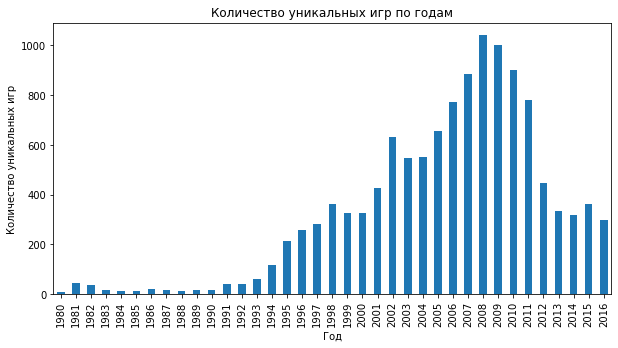

In [35]:
games_per_year.plot(kind='bar', figsize=(10,5))
plt.xlabel('Год')
plt.ylabel('Количество уникальных игр')
plt.title('Количество уникальных игр по годам');

In [36]:
#plt.figure(figsize=(10,5))
#plt.hist(games['year_of_release'].dropna(), bins=37)
#plt.grid(True)
#plt.xlabel('Год выпуска')
#plt.ylabel('Количество игр')
#plt.title('Количество игр, выпущенных в разные годы');

Данные представлены с 1980 до 2016 года.   
На графике видно, что количество выпускаемых игр начиннает активно расти с 1994 года (с выхода Sony PlayStation), в 1999 и 2000 годах - небольшрй спад, а дальше количество игр достигает своего пика в 2008 году. Далее следует спад выпуска игр (дотаточно резкий в 2011 году), и выпуск игр начинает выравниваться только к 2012 году. Далее количество выпускаемых игр меняется не так сильно (то немного возрастает, то снова уменьшается). Резкий спад в 2011 году можно объяснить тем, что многие игровые платформы, которые доминировали на рынке в предыдущие годы уже находились на стадии заката и игр для них выпускали всё меньше (компании переключились на разработку игр для новых платформ).   
С выходом новых платформ объём выпускаемых игр начал стабилизироваться, но он не доходит до значений предыдущих лет. Это может быть связано с тем, что в 2012 - 2016 годах проходила смена поколений платформ, и разработчики только осваивали возможности новых платформ. Также, с появление новых более мощных платформ увеличились затраты на выпуск игр для них, из-за чего, соответственно снизилось количество выпускаемых игр. Ещё одним фактором снижения количества игр могло стать появление в 2012 году игр для мобильных платформ. Однако, игры для новых платформ получили улучшенные технологии и их количество переросло в качество.  
Данные до 1994 года не так важны для анализа, так как в это время было выпущено очень мало игр. Плюс, рейтинг ESRB тоже появился только в 1994 году, а значит данных по нему до этого года - нет, и для данных до этого года нельзя будет провести полноценный анализ.

##### Изменение продаж по платформам

In [37]:
platforms_change = games.pivot_table(index='platform', values= 'total_sales', aggfunc= 'sum')
platforms_change = platforms_change.sort_values(by='total_sales', ascending = False).head(10)
display(platforms_change)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.64
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [38]:
platforms_change = platforms_change.reset_index()

In [39]:
platforms_change= platforms_change.sort_values(by='total_sales')

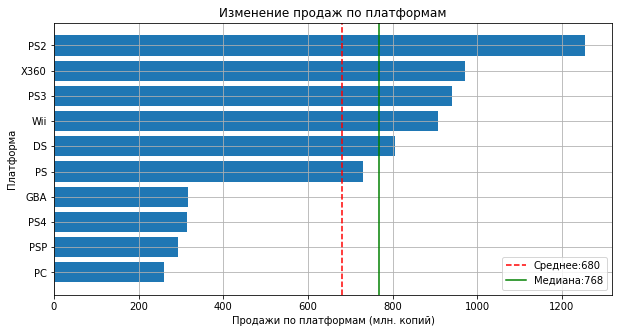

In [40]:
plt.figure(figsize=(10,5))
plt.barh(platforms_change['platform'], platforms_change['total_sales'])
plt.grid(True)
plt.xlabel('Продажи по платформам (млн. копий)')
plt.ylabel('Платформа')
plt.title('Изменение продаж по платформам')
mean = platforms_change['total_sales'].mean()
median = platforms_change['total_sales'].median()
plt.axvline(mean, color='r', linestyle='--', label=f'Среднее:{mean:.0f}')
plt.axvline(median, color = 'g', linestyle='-', label = f'Медиана:{median:.0f}')
plt.legend();

Наибольшее число продаж имеют 6 платформ: **PS2** (1255,77 млн. копий), **X360** (971,42 млн. копий), **PS3** (939,64 млн. копий), **Wii** (907,51 млн. копий), **DS** (806,12 млн. копий) и **PS** (730,86 млн. копий). У всех платформ количество продаж выше среднего значения. 

In [41]:
#проанализируем 6 самых популярных платформ
#top_platform = games.query('platform == ("PS2", "X360", "PS3", "Wii", "DS", "PS")')

In [42]:
top_list = games.pivot_table(index='platform', values='total_sales', 
                             aggfunc= 'sum').sort_values('total_sales', ascending=False)
top_platforms = top_list.index[:6].tolist()
top_platform = games[games['platform'].isin(top_platforms)]

In [43]:
top_platform_change = top_platform.pivot_table(index= 'year_of_release', values= 'total_sales', 
                                               columns = 'platform', aggfunc= 'sum')
display(top_platform_change)

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


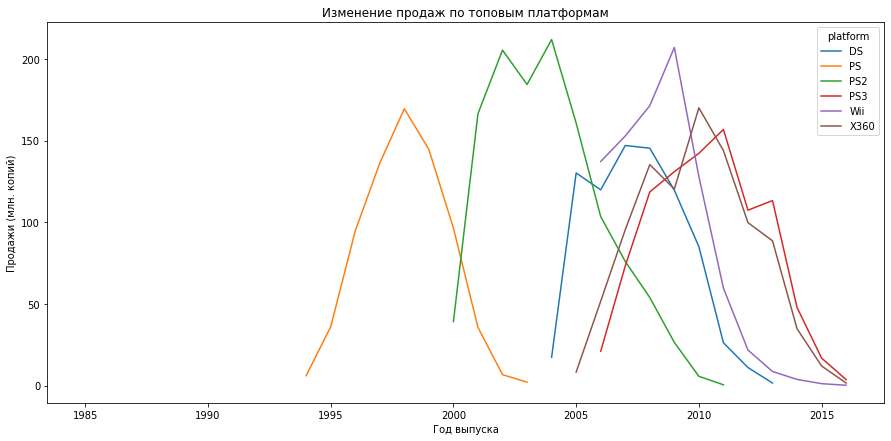

In [44]:
top_platform_change.plot(figsize=(15,7))
plt.xlabel('Год выпуска')
plt.ylabel('Продажи (млн. копий)')
plt.title('Изменение продаж по топовым платформам');

На графике видно как происходит жизненный цикл платформ как товара: разработка продукта, внедрение его на рынок, рост продаж, зрелость, спад и уход с рынка. На графике можно видеть, что средняя "продолжительность жизни" платформы составляет 10 лет. И, примерно раз в 5 лет, появляются новые платформы.  
Сейчас все актупальные платформы находятся на стадии спада, или близки к ней.

С учётом того, что жизненный цикл платформы составляет 10 лет, а для составления капании на 2017 год нам для анализа нужно выбрать платформы, которые находятся в фазе зрелости и популярности, ***актуальный период*** я предлагаю взять с ***2014 до 2016 года***. Рынок игр меняется очень быстро, и по даннным за 3 года мы сможем отследить актуальные тренды для составления кампании.

In [45]:
games_actual = games.loc[games['year_of_release']>=2014]

In [46]:
games_actual['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [47]:
games_actual_sales = games_actual.pivot_table(index='platform', values= 'total_sales', aggfunc= 'sum')
games_actual_sales = games_actual_sales.sort_values(by='total_sales', ascending = False)
display(games_actual_sales)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


По общим продажам мы можем выделить 3 платформы, которые выделяются значениями на фоне остальных - это **PS4**, **XOne** и **3DS**.

In [48]:
games_actual_sales_change = games_actual.pivot_table(index= 'year_of_release', values= 'total_sales', columns= 'platform')
display(games_actual_sales_change)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,0.547000,0.282553,0.442222,1.333333,0.024,0.119000,0.625,0.710645,0.551429,0.886393
2015,0.323023,0.170400,0.230411,0.867883,0.040,0.056818,0.285,0.583929,0.341714,0.751750
2016,0.329130,0.097222,0.094737,0.422256,NaN,0.050000,0.180,0.328571,0.116923,0.300575


Рассмотрим, на каком этапе жизненного цикла находятся все платформы.

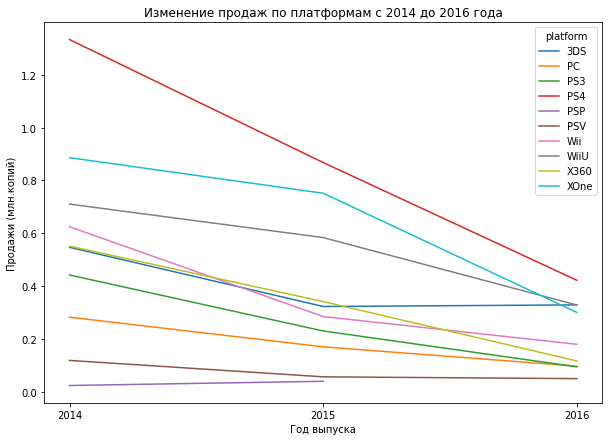

In [114]:
games_actual_sales_change.plot(figsize=(10,7))
plt.xticks(ticks=range(int(games_actual['year_of_release'].min()), 
                       int(games_actual['year_of_release'].max())+1, 1))
plt.xlabel('Год выпуска')
plt.ylabel('Продажи (млн.копий)')
plt.title('Изменение продаж по платформам с 2014 до 2016 года');

На графике видно, что практически все платформы находятся на этапе спада, и можно наблюдать падение продаж. Из всех платформ только 3DS показывает небольшой рост в продажах (с 0,323 млн. копий до 0,329 млн. копий). Также перспективными, несмотря на спад продаж, можно считать платформы PS4 и XOne, которые находятся на переходе между стадией зрелости и спада. 

##### Пострим "ящик с усами" по глобальным продажам игр с разбивкой по платформам

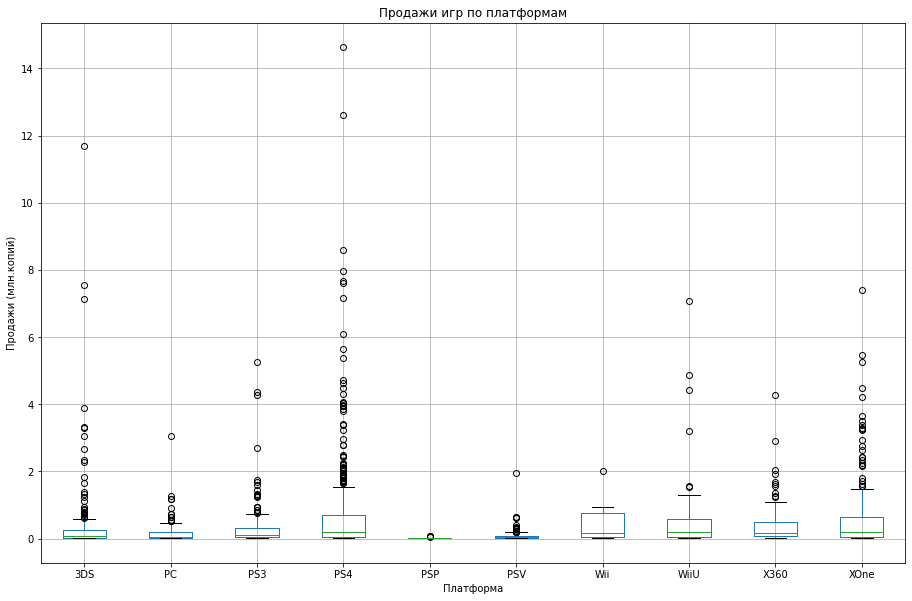

In [50]:
games_actual.boxplot(column='total_sales', by='platform', figsize=(15,10))
plt.xlabel('Платформа')
plt.suptitle('')
plt.ylabel('Продажи (млн.копий)')
plt.title('Продажи игр по платформам');

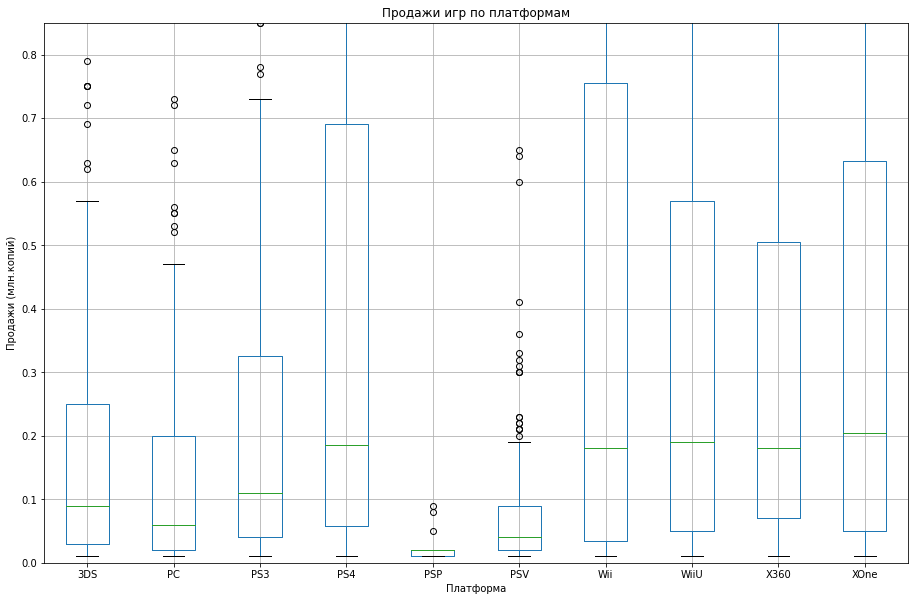

In [51]:
games_actual.boxplot(column='total_sales', by='platform', figsize=(15,10))
plt.ylim(0,0.85)
plt.xlabel('Платформа')
plt.suptitle('')
plt.ylabel('Продажи (млн.копий)')
plt.title('Продажи игр по платформам');

In [52]:
games_actual['total_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

Построив "ящик с усами" для разных платформ мы можем сказать, что по всем платформам наблюдаются выбросы - игры с высокими продажами.  
С помощью метода describe было полученно, что медианное значение продаж для всех платформ составляет 0,1 млн.копий, но на графике видно, что многие платформы имеют медиану отличную от этого значения. У платформ  3DC, PC, PSP, PSV медиана гораздо ниже средней медианы. А у платформ PS3, PS4, WiiU, X360 и XOne медиана намного выше среднего значения.  
Медиана и третьи квартили у PS4, Wii, WiiU, X360 и XOne находятся намного выше, чем у других платформ. Это может указывать на то, что эти платформы пользовались большей популярностью, чем остальные, и то, что на эти платформы было выпущено больше игр.

##### Влияние отзывов пользователей и критиков на продажи на примере платформы PS3

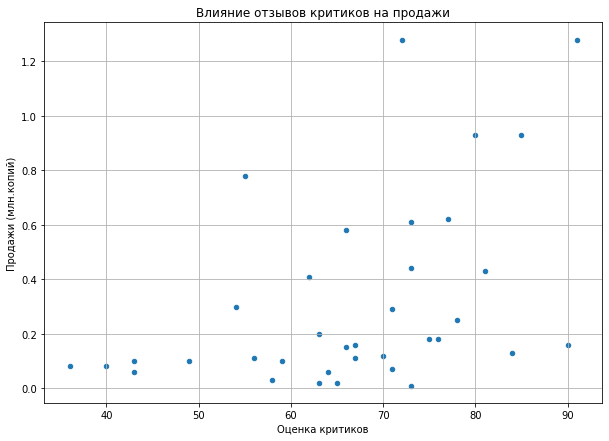

In [53]:
games_ps3 = games_actual[games_actual['platform']=='PS3']
games_ps3.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,7))
plt.title('Влияние отзывов критиков на продажи')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (млн.копий)')
plt.grid(True);

In [54]:
print('Корреляция между отзывами критиков и продажами равна:', games_ps3['critic_score'].corr(games_ps3['total_sales']))

Корреляция между отзывами критиков и продажами равна: 0.44657460493190704


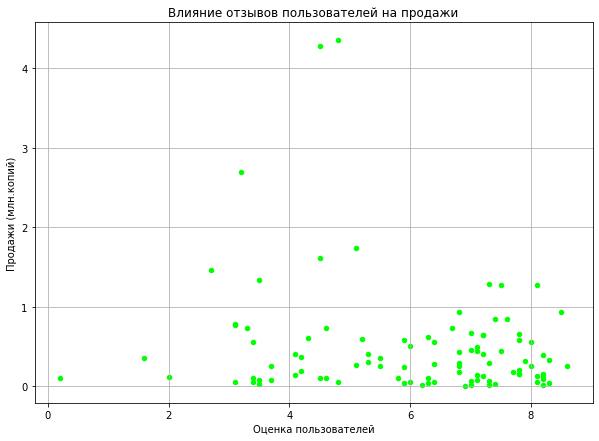

In [55]:
games_ps3.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,7), color='lime')
plt.title('Влияние отзывов пользователей на продажи')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (млн.копий)')
plt.grid(True);

In [56]:
print('Корреляция между отзывами пользователей и продажами равна:', games_ps3['user_score'].corr(games_ps3['total_sales']))

Корреляция между отзывами пользователей и продажами равна: -0.16676141347662118


Связь между отзывами критиков и продажами есть, но довольно слабая. А между отзывами пользователей и продажами связи практически нет. Говорить о зависимости между отзывами и продажами нельзя.

##### Проверим, существует ли связь между отзывами и продажами на примере других популярных платформ

###### Платформа PS4

In [57]:
games_ps4 = games_actual[games_actual['platform']=='PS4']
print('Корреляция между отзывами критиков и продажами равна:', games_ps4['critic_score'].corr(games_ps4['total_sales']))
print('Корреляция между отзывами пользователей и продажами равна:', games_ps4['user_score'].corr(games_ps4['total_sales']))

Корреляция между отзывами критиков и продажами равна: 0.40266141068104083
Корреляция между отзывами пользователей и продажами равна: -0.040131589472697356


Результаты похожи на те, что мы получили при проверке связей для PS3. Связь между отзывами критиков и продажами есть, но очень слабая, а связи между отзывами пользователей и продажами прктически нет (в данном случае, связь - отрицательная)

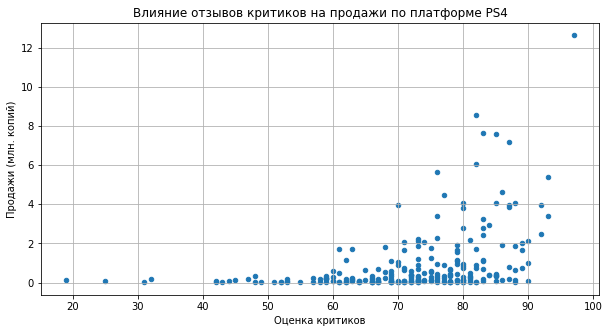

In [58]:
games_ps4.plot(kind='scatter', x= 'critic_score', y= 'total_sales', figsize=(10,5))
plt.title('Влияние отзывов критиков на продажи по платформе PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (млн. копий)')
plt.grid(True);

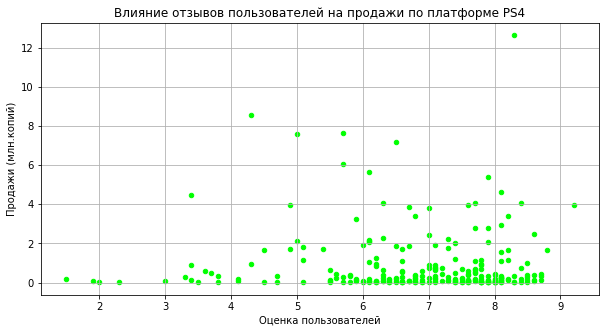

In [59]:
games_ps4.plot(kind='scatter', x= 'user_score', y= 'total_sales', figsize=(10,5), color='lime')
plt.title('Влияние отзывов пользователей на продажи по платформе PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (млн.копий)')
plt.grid(True);

###### Платформа X360

In [60]:
games_x360 = games_actual[games_actual['platform']=='X360']
print('Корреляция между отзывами критиков и продажами равна:', games_x360['critic_score'].corr(games_x360['total_sales']))
print('Корреляция между отзывами пользователей и продажами равна:', games_x360['user_score'].corr(games_x360['total_sales']))

Корреляция между отзывами критиков и продажами равна: 0.5257228356581523
Корреляция между отзывами пользователей и продажами равна: -0.138444570945665


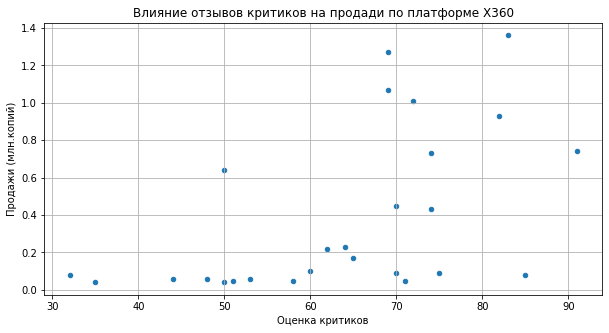

In [61]:
games_x360.plot(kind='scatter', x= 'critic_score', y= 'total_sales', figsize=(10,5))
plt.title('Влияние отзывов критиков на продади по платформе X360')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (млн.копий)')
plt.grid(True);

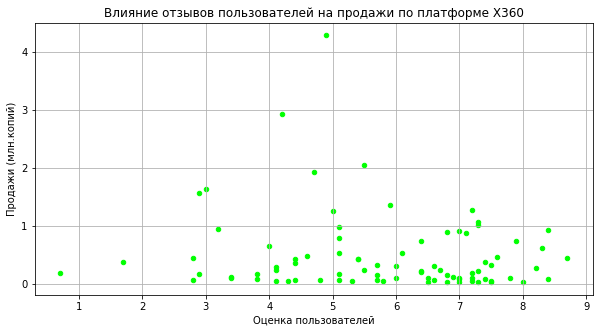

In [62]:
games_x360.plot(kind='scatter', x= 'user_score', y= 'total_sales', figsize=(10,5), color= 'lime')
plt.title('Влияние отзывов пользователей на продажи по платформе X360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (млн.копий)')
plt.grid(True);

Для данной платформы ситуация такая же, как и для двух предыдущих: связь между отзывами критиков и продажами очень слабая, а между отзывами пользователей и продажами практически отсутствует

###### Целая выборка

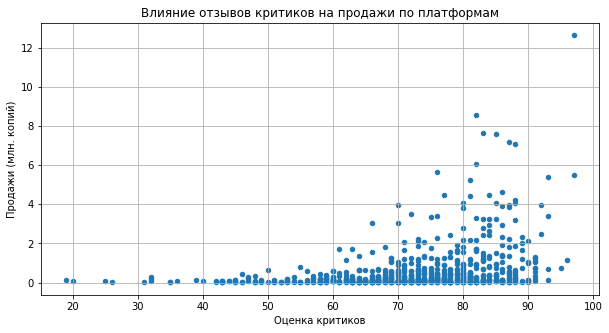

In [63]:
games_actual.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,5))
plt.title('Влияние отзывов критиков на продажи по платформам')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (млн. копий)')
plt.grid(True);

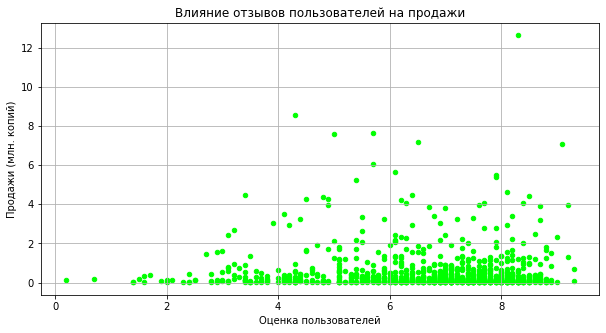

In [64]:
games_actual.plot(kind='scatter', x= 'user_score', y= 'total_sales', figsize=(10,5), color='lime')
plt.title('Влияние отзывов пользователей на продажи')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (млн. копий)')
plt.grid(True);

In [65]:
print('Корреляция между отзывами критиков и продажами равна:', games_actual['critic_score'].corr(games_actual['total_sales']))
print('Корреляция между отзывами пользователей и продажами равна:',games_actual['user_score'].corr(games_actual['total_sales']))

Корреляция между отзывами критиков и продажами равна: 0.328105086966363
Корреляция между отзывами пользователей и продажами равна: -0.013070305002484585


***Вывод:***

* С учётом низкого коэффициента корреляции для отзывов критиков и продаж, можно сказать, что между отзывами критиков и объёмом продаж игр существует прямая, слабая связь.

* С учётом очень низкого (а в одном случае даже отрицательного) коэффициента корреляции между отзывами пользователей и уровнем продаж говорить о наличии линейной зависимости нельзя, и можно сказать, что связи между отзывами пользователей и продажами практически нет.
* Но может быть и такое, что между этими переменными есть более сложная, нелинейная связь. которую нельзя увидеть с помощью коэффициента корреляции, и требуют более подробного исследования.

##### Распределение игр по жанрам

In [66]:
genres = games_actual.pivot_table(index='genre', values= 'total_sales', aggfunc='sum')
genres = genres.sort_values(by='total_sales', ascending= False)
display(genres)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


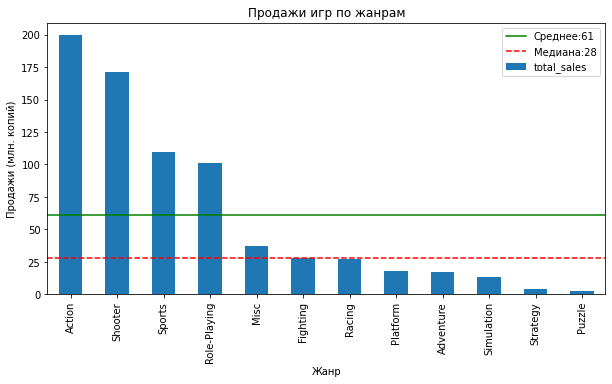

In [67]:
genres.plot(kind='bar', figsize=(10,5))
plt.title ('Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн. копий)')
genres_median = genres['total_sales'].median()
genres_mean = genres['total_sales'].mean()
plt.axhline(genres_mean, color='g', linestyle='-', label = f'Среднее:{genres_mean:.0f}')
plt.axhline(genres_median, color = 'r', linestyle='--', label = f'Медиана:{genres_median:.0f}')
plt.legend();

На графике видно, что самыми популярными жанрами являются Action (экшн), Sports (спортивные игры) и Shooter (стрелялки). Продажи по ним превышают и среднее, и медианное значение.

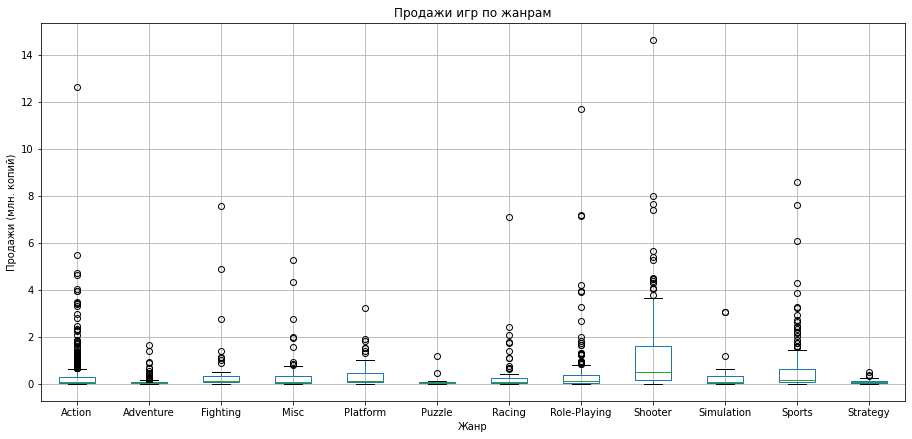

In [68]:
games_actual.boxplot(column='total_sales', by='genre', figsize=(15,7))
plt.suptitle('')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн. копий)')
plt.title('Продажи игр по жанрам');

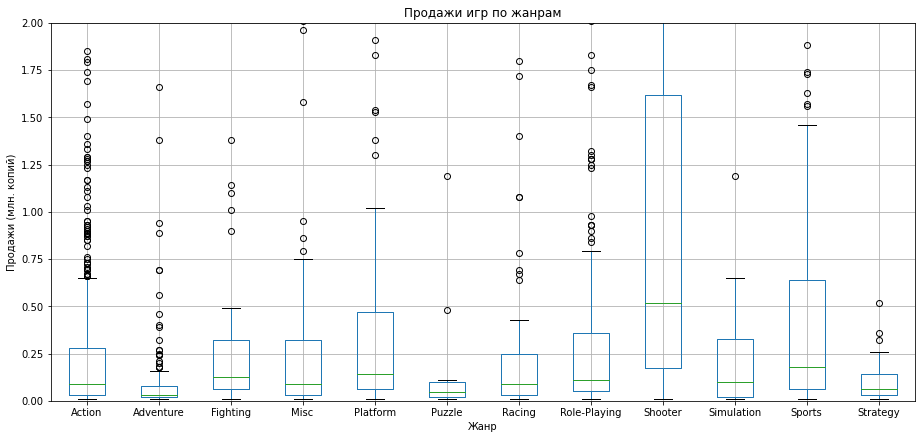

In [69]:
games_actual.boxplot(column='total_sales', by='genre', figsize=(15,7))
plt.ylim(0,2)
plt.suptitle('')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн. копий)')
plt.title('Продажи игр по жанрам');

Построив "ящик с усами" для разных жанров игр мы можем сказать, что по всем жанрам наблюдаются выбросы - игры с высокими продажами. У большинства жанров медиана находится на близком уровне, исключение составляют жанры Adventure, Puzzle и Strategy, у которых медиана ниже среднего уровня. У жанра Shooter медиана и третий квартиль находится намного выше остальных жанров.  . 
Это может указывать на то, что этот жанр пользовался большей популярностью, чем остальные, и то, что игр данного жанра было выпущено больше.

# ***Вывод:***

* Количество выпускаемых игр начиннает расти с 1994 года (с выхода Sony PlayStation) и достигает своего пика примерно в 2008 году. Далее следует резкий спад выпуска игр, и выпуск игр начинает выравниваться только к 2012 году. Далее количество выпускаемых игр меняется не так сильно (то немного возрастает, то снова уменьшается). Резкий спад в 2011 году можно объяснить тем, что многие игровые платформы, которые доминировали на рынке в предыдущие годы уже находились на стадии заката и игр для них выпускали всё меньше (компании переключились на разработку игр для новых платформ).  

С выходом новых платформ объём выпускаемых игр начал стабилизироваться, но он не доходит до значений предыдущих лет. Это может быть связано с тем, что в 2012 - 2016 годах проходила смена поколений платформ, и разработчики только осваивали возможности новых платформ. Также, с появление новых более мощных платформ увеличились затраты на выпуск игр для них, из-за чего, соответственно снизилось количество выпускаемых игр. Ещё одним фактором снижения количества игр могло стать появление в 2012 году игр для мобильных платформ. Однако, игры для новых платформ получили улучшенные технологии и их количество переросло в качество.  


* Данные до 1994 года не так важны для анализа, так как в это время было выпущено очень мало игр. Плюс, рейтинг ESRB тоже появился только в 1994 году, а значит данных по нему до этого года - нет, и для данных до этого года нельзя будет провести полноценный анализ.  


* Средняя "продолжительность жизни" платформы составляет примерно 10 лет. И, примерно раз в 5 лет, появляются новые платформы.
Сейчас все актупальные платформы находятся на стадии спада, или близки к ней.  


* С учётом того, что жизненный цикл платформы составляет 10 лет, а для составления капании на 2017 год нам для анализа нужно выбрать платформы, которые находятся в фазе зрелости и популярности, я думаю, что нужно рассматривать промежуток времени с 2014 года. Рынок игр быстро развивается, и чтобы сделать качественный прогноз нам потребуются самые свежие данные по актуальным платформам. Поэтому ***актуальный период*** для составления рекламной кампании я предлагаю взять с ***2014 до 2016 года***. 


* По общим продажам за актуальный период своими значениями выделяются 3 платформы: **PS4**, **XOne** и **3DS**.


* К 2016 году практически все платформы находятся на этапе спада, и можно наблюдать падение продаж. Из всех платформ только **3DS** показывает небольшой рост в продажах (с 0,323 млн. копий до 0,329 млн. копий). Также перспективными, несмотря на спад продаж, можно считать платформы **PS4** и **XOne**, которые появились в 2013 году и находятся на стадии зрелости. 


* Проанализировав "ящик с усами" для разных платформ, можно сказать, что многие платформы имеют медиану отличную от среднего значения. У платформ  DC, PC, PSP, PSV медиана гораздо ниже средней медианы,  а у платформ PS4, Wii, WiiU, X360 и XOne медиана, наоборот, намного выше среднего значения.  
Третьи квартили у данных платформ также находятся намного выше, чем у других платформ. Это может указывать на то, что эти платформы пользовались большей популярностью, чем остальные, и то, что на эти платформы было выпущено больше игр.


* С учётом низкого коэффициента корреляции для отзывов критиков и продаж, можно сказать, что отзывы критиков очень слабо влияют на объёмы продаж игр, то есть выскокие оценки критиков не означают, что продажи будут значительно увеличиваться (и наоборот). Также нельзя сказать и о наличии линейной зависимости между отзывами пользователей и уровнем продаж, и  можно сказать, что отзывы пользователей не оказывают на продажи практически никакого влияния.



* Самыми популярными жанрами являются **Action** (экшн), **Sports** (спортивные игры) и **Shooter** (стрелялки). Продажи по ним превышают и среднее, и медианное значение. У жанра Shooter медиана и третий квартиль находится намного выше остальных жанров. Это может указывать на то, что этот жанр пользовался большей популярностью, чем остальные, и то, что игр данного жанра было выпущено больше.

#### Шаг 4. Портреты пользователей каждого региона 

##### Регион Северная Америка (NA)

###### Популярные платформы

In [70]:
games_na = games_actual.pivot_table(index= 'platform', values='na_sales', aggfunc='sum')
games_na= games_na.sort_values(by='na_sales', ascending = False)
display(games_na)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


In [71]:
#games_na=games_na.reset_index()

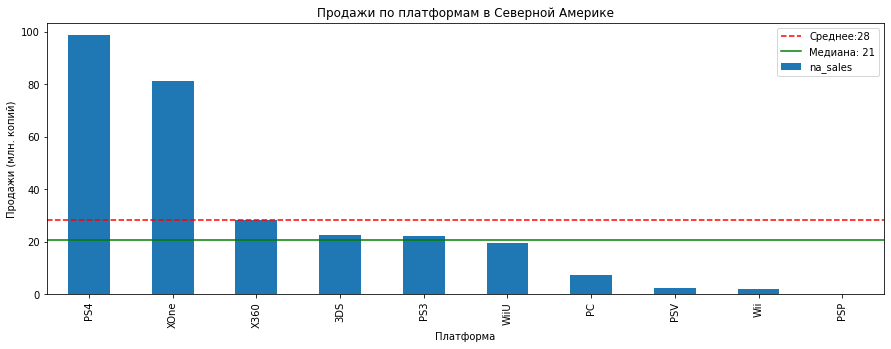

In [72]:
games_na.plot(kind='bar', figsize=(15,5))
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн. копий)')
plt.title('Продажи по платформам в Северной Америке')
mean_sales_na = games_na['na_sales'].mean()
median_sales_na = games_na['na_sales'].median()
plt.axhline(mean_sales_na, color="r", linestyle="--", label=f"Среднее:{mean_sales_na:.0f}")
plt.axhline(median_sales_na, color="g", linestyle="-", label=f"Медиана: {median_sales_na:.0f}")
plt.legend();

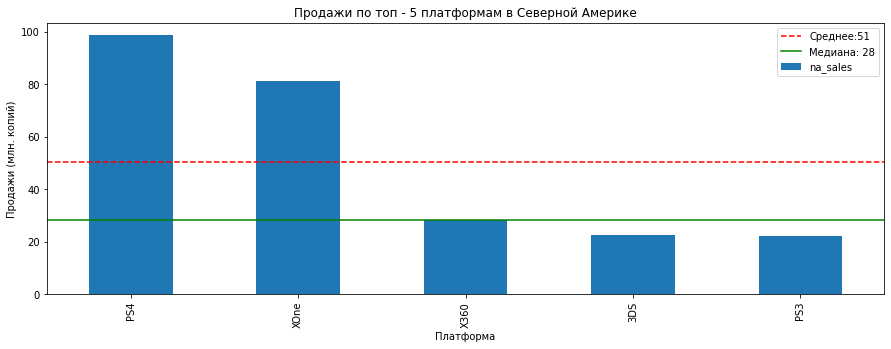

In [73]:
games_na_top = games_na.head(5)
games_na_top.plot(kind='bar', figsize=(15,5))
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн. копий)')
plt.title('Продажи по топ - 5 платформам в Северной Америке')
mean_sales = games_na_top['na_sales'].mean()
median_sales = games_na_top['na_sales'].median()
plt.axhline(mean_sales, color="r", linestyle="--", label=f"Среднее:{mean_sales:.0f}")
plt.axhline(median_sales, color="g", linestyle="-", label=f"Медиана: {median_sales:.0f}")
plt.legend();

Самыми популярными в Северной Америке (Топ - 5) являются: **PS4**, **XOne**, **X360**, **3DS** и **PS3**.

In [74]:
games_na['share'] = games_na['na_sales']/games_na['na_sales'].sum()
display(games_na)

,na_sales,share
platform,,
PS4,98.61,0.347145
XOne,81.27,0.286102
X360,28.30,0.099627
3DS,22.64,0.079701
PS3,22.05,0.077624
WiiU,19.36,0.068155
PC,7.23,0.025452
PSV,2.52,0.008871
Wii,2.08,0.007322


In [75]:
#top_games_na = games_na.head(5)

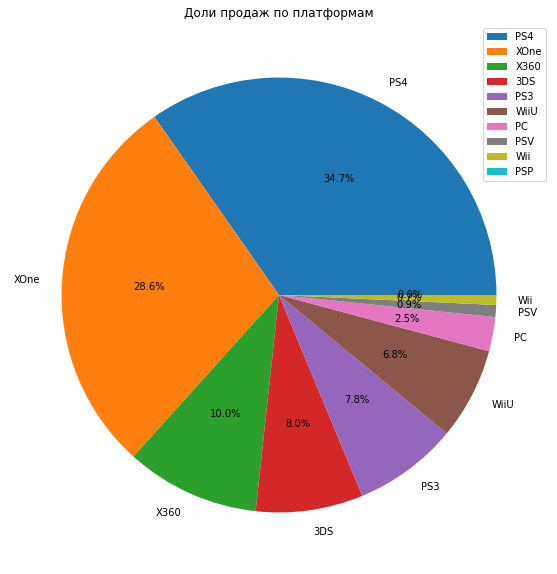

In [76]:
games_na.plot(kind='pie', y= 'na_sales', figsize= (10,10), autopct='%1.1f%%')
plt.title('Доли продаж по платформам')
plt.ylabel('');

Из диаграммы выше видно, что PS4 занимает 34,7% от продаж, XOne занимает 28,6%, X360 - 10%, 3DS - 8%, а PS3 занимает меньше всех продаж - 7,8%.

###### Популярные жанры

In [77]:
genres_na = games_actual.pivot_table(index= 'genre', values= 'na_sales', aggfunc='sum')
genres_na = genres_na.sort_values(by='na_sales', ascending = False)
display(genres_na)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
Fighting,12.43
Racing,8.74
Platform,6.79
Adventure,5.64


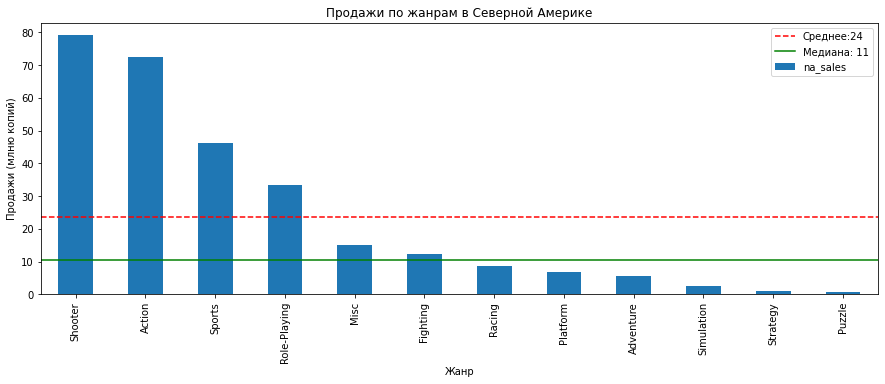

In [78]:
genres_na.plot(kind='bar', figsize=(15,5))
plt.xlabel('Жанр')
plt.ylabel('Продажи (млню копий)')
plt.title('Продажи по жанрам в Северной Америке')
mean_sales_genres_na = genres_na['na_sales'].mean()
median_sales_genres_na = genres_na['na_sales'].median()
plt.axhline(mean_sales_genres_na, color="r", linestyle="--", label=f"Среднее:{mean_sales_genres_na:.0f}")
plt.axhline(median_sales_genres_na, color="g", linestyle="-", label=f"Медиана: {median_sales_genres_na:.0f}")
plt.legend();

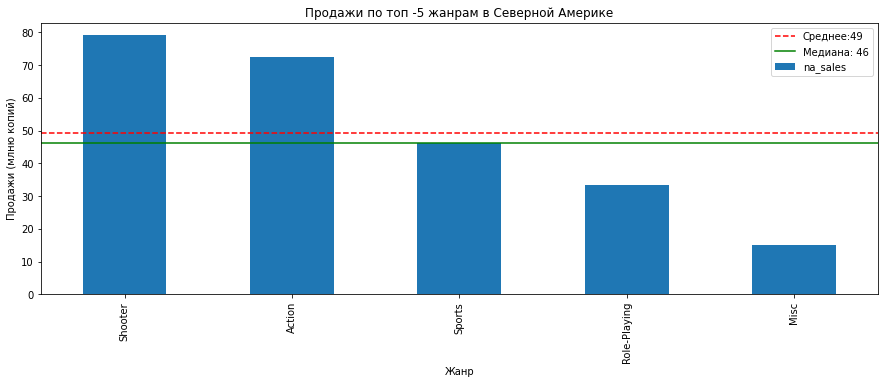

In [79]:
genres_na_top = genres_na.head(5)
genres_na_top.plot(kind='bar', figsize=(15,5))
plt.xlabel('Жанр')
plt.ylabel('Продажи (млню копий)')
plt.title('Продажи по топ -5 жанрам в Северной Америке')
mean_sales_genres_na = genres_na_top['na_sales'].mean()
median_sales_genres_na = genres_na_top['na_sales'].median()
plt.axhline(mean_sales_genres_na, color="r", linestyle="--", label=f"Среднее:{mean_sales_genres_na:.0f}")
plt.axhline(median_sales_genres_na, color="g", linestyle="-", label=f"Медиана: {median_sales_genres_na:.0f}")
plt.legend();

Самыми популярными жанрами (Топ - 5 ) являются **Action (экшен), Sports (спортивные игры), Shooter (стрелялки), Music (прочие жанры) и Role-Playing (ролевые игры)**. 

###### Влияние рейтинга ESRB

In [80]:
raiting_na = games_actual.pivot_table(index= 'rating', values= 'na_sales', aggfunc='sum')
raiting_na = raiting_na.sort_values(by='na_sales', ascending = False)
display(raiting_na)

,na_sales
rating,
M,96.42
unknown,64.72
E,50.74
T,38.95
E10+,33.23


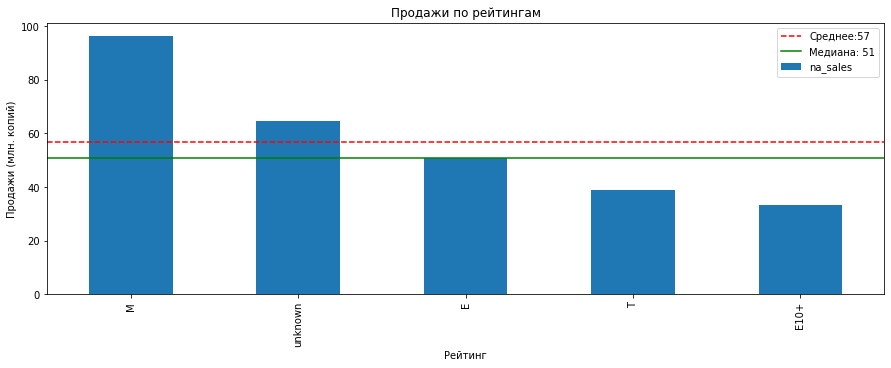

In [81]:
raiting_na.plot(kind='bar', figsize=(15,5))
plt.xlabel('Рейтинг')
plt.ylabel('Продажи (млн. копий)')
plt.title('Продажи по рейтингам')
mean_sales_raiting_na = raiting_na['na_sales'].mean()
median_sales_raiting_na= raiting_na['na_sales'].median()
plt.axhline(mean_sales_raiting_na, color="r", linestyle="--", label=f"Среднее:{mean_sales_raiting_na:.0f}")
plt.axhline(median_sales_raiting_na, color="g", linestyle="-", label=f"Медиана: {median_sales_raiting_na:.0f}")
plt.legend();

Самыми популярными рейтингами являются **M** ("для игроков от 17 лет"), **unknown** , **E** ("для всех"),  **T** ("для подростков от 13 лет и старше"), **E10+** ("для всех от 10 лет").

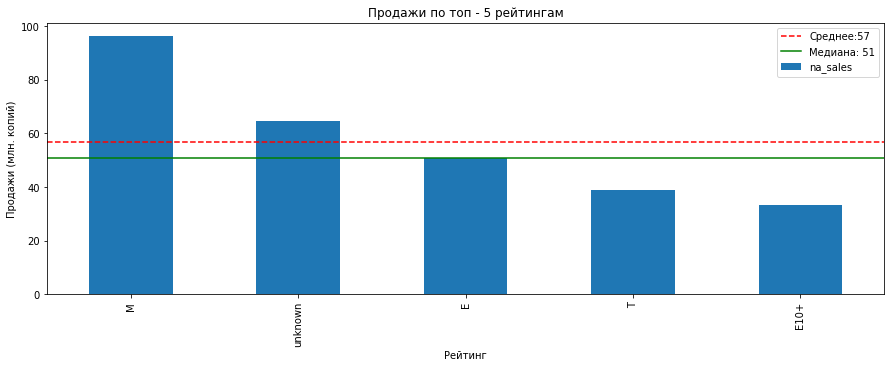

In [82]:
raiting_na_top = raiting_na.head(5)
raiting_na_top.plot(kind='bar', figsize=(15,5))
plt.xlabel('Рейтинг')
plt.ylabel('Продажи (млн. копий)')
plt.title('Продажи по топ - 5 рейтингам')
mean_sales_raiting_na = raiting_na_top['na_sales'].mean()
median_sales_raiting_na= raiting_na_top['na_sales'].median()
plt.axhline(mean_sales_raiting_na, color="r", linestyle="--", label=f"Среднее:{mean_sales_raiting_na:.0f}")
plt.axhline(median_sales_raiting_na, color="g", linestyle="-", label=f"Медиана: {median_sales_raiting_na:.0f}")
plt.legend();

***Вывод:***

* Самыми популярными платформами в Северной Америке являются: **PS4** (занимает 34,7% от продаж), **XOne** (28,6%), **X360** (10%), **3DS** (8%) и **PS3** (7,8%).  

* Самыми популярными жанрами являются **Action (экшен), Sports (спортивные игры), Shooter (стрелялки), Misc (прочие жанры) и Role-Playing (ролевые игры)**.  

* Самыми популярными рейтингами являются **M** ("для игроков от 17 лет"), **unknown**, **E** ("для всех"), **T** ("для подростков от 13 лет и старше"), **E10+** ("для всех от 10 лет") и игры .

##### Регион Европа (Eu)

###### Популярные платформы

In [83]:
platforms_eu = games_actual.pivot_table(index= 'platform', values= 'eu_sales', aggfunc= 'sum')
platforms_eu = platforms_eu.sort_values(by='eu_sales', ascending=False)
display(platforms_eu)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


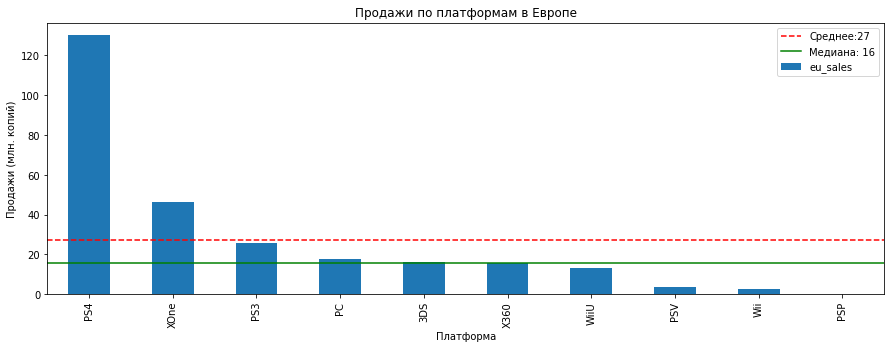

In [84]:
platforms_eu.plot(kind= 'bar', figsize=(15,5))
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн. копий)')
plt.title('Продажи по платформам в Европе')
mean_sales_eu = platforms_eu['eu_sales'].mean()
median_sales_eu = platforms_eu['eu_sales'].median()
plt.axhline(mean_sales_eu, color="r", linestyle="--", label=f"Среднее:{mean_sales_eu:.0f}")
plt.axhline(median_sales_eu, color="g", linestyle="-", label=f"Медиана: {median_sales_eu:.0f}")
plt.legend();

Самыми популярными платформами (топ - 5) являются **PS4**, **XOne**, **PS3**, **PC** и**DS**.

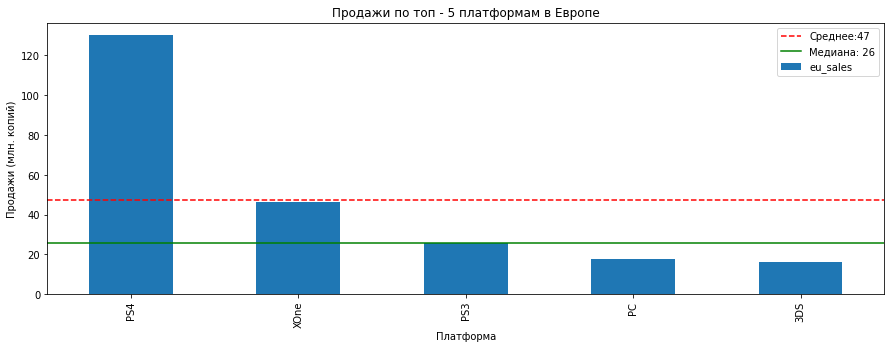

In [85]:
platforms_eu_top = platforms_eu.head(5)
platforms_eu_top.plot(kind= 'bar', figsize=(15,5))
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн. копий)')
plt.title('Продажи по топ - 5 платформам в Европе')
mean_sales_eu = platforms_eu_top['eu_sales'].mean()
median_sales_eu = platforms_eu_top['eu_sales'].median()
plt.axhline(mean_sales_eu, color="r", linestyle="--", label=f"Среднее:{mean_sales_eu:.0f}")
plt.axhline(median_sales_eu, color="g", linestyle="-", label=f"Медиана: {median_sales_eu:.0f}")
plt.legend();

In [86]:
platforms_eu['share'] = platforms_eu['eu_sales']/platforms_eu['eu_sales'].sum()

In [87]:
top_platforms_eu= platforms_eu.head(5)

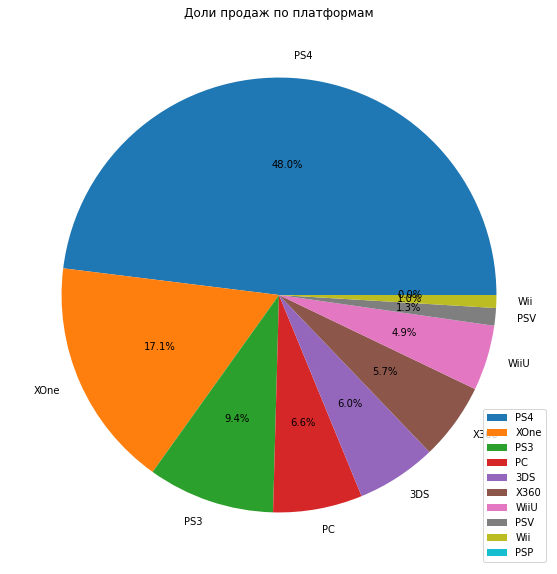

In [88]:
platforms_eu.plot(kind='pie', y='eu_sales', figsize=(10,10), autopct='%1.1f%%')
plt.title('Доли продаж по платформам')
plt.ylabel('');

Из диаграммы выше видно, что PS4 занимает 48 % от продаж, XOne занимает 17,1%, PS3 - 9,4%, PC - 6,6%, а 3DS занимает 6% продаж.

###### Популярные жанры

In [89]:
genres_eu= games_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum' )
genres_eu= genres_eu.sort_values(by='eu_sales', ascending = False)
display(genres_eu)

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
Misc,12.86
Simulation,7.30
Platform,6.80
Fighting,6.69


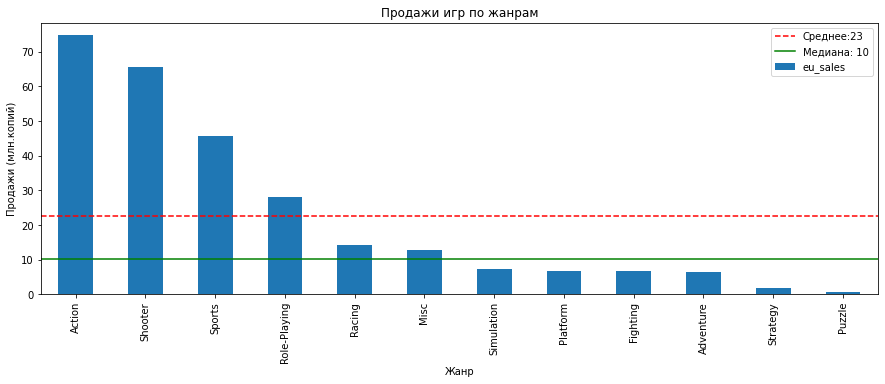

In [90]:
genres_eu.plot(kind='bar', figsize=(15,5))
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн.копий)')
plt.title('Продажи игр по жанрам')
mean_sales_genres_eu = genres_eu['eu_sales'].mean()
median_sales_genres_eu = genres_eu['eu_sales'].median()
plt.axhline(mean_sales_genres_eu, color="r", linestyle="--", label=f"Среднее:{mean_sales_genres_eu:.0f}")
plt.axhline(median_sales_genres_eu, color="g", linestyle="-", label=f"Медиана: {median_sales_genres_eu:.0f}")
plt.legend();

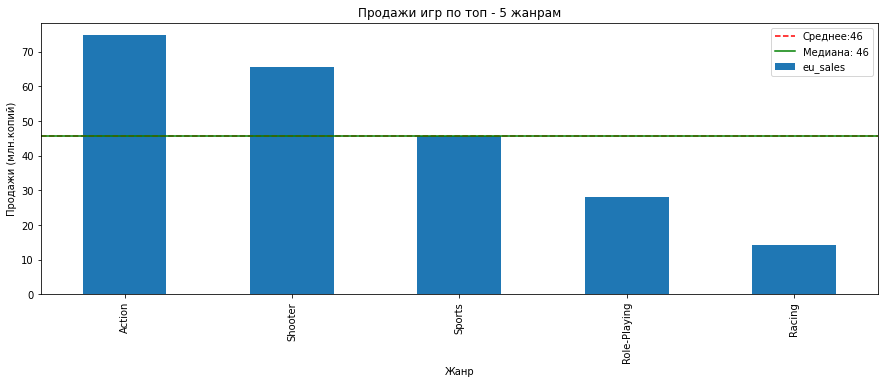

In [91]:
genres_eu_top = genres_eu.head(5)
genres_eu_top.plot(kind='bar', figsize=(15,5))
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн.копий)')
plt.title('Продажи игр по топ - 5 жанрам')
mean_sales_genres_eu = genres_eu_top['eu_sales'].mean()
median_sales_genres_eu = genres_eu_top['eu_sales'].median()
plt.axhline(mean_sales_genres_eu, color="r", linestyle="--", label=f"Среднее:{mean_sales_genres_eu:.0f}")
plt.axhline(median_sales_genres_eu, color="g", linestyle="-", label=f"Медиана: {median_sales_genres_eu:.0f}")
plt.legend();

Самыми популярными жанрами (Топ - 5 ) являются **Action (экшен), Shooter (стрелялки), Sports (спортивные игры),  Role-Playing (ролевые игры) и Racing (гонки)**. 

###### Влияние рейтинга ESRB

In [92]:
raiting_eu = games_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
raiting_eu = raiting_eu.sort_values(by='eu_sales', ascending=False)
display(raiting_eu)

,eu_sales
rating,
M,93.44
unknown,58.95
E,58.06
T,34.07
E10+,26.16


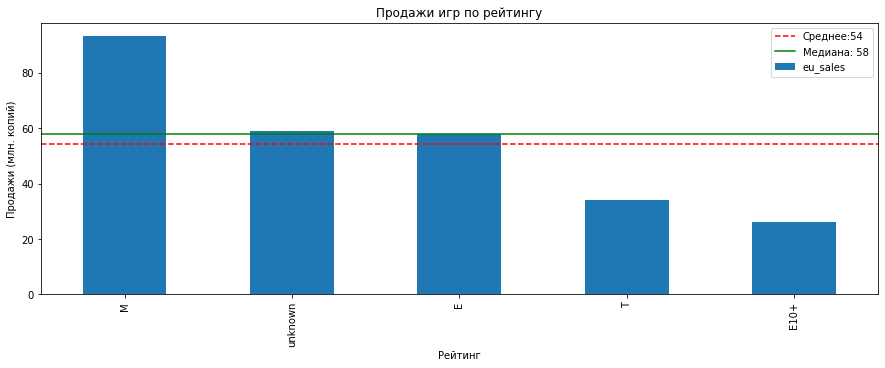

In [93]:
raiting_eu.plot(kind='bar', figsize=(15,5))
plt.xlabel('Рейтинг')
plt.ylabel('Продажи (млн. копий)')
plt.title('Продажи игр по рейтингу')
mean_sales_raiting_eu = raiting_eu['eu_sales'].mean()
median_sales_raiting_eu = raiting_eu['eu_sales'].median()
plt.axhline(mean_sales_raiting_eu, color="r", linestyle="--", label=f"Среднее:{mean_sales_raiting_eu:.0f}")
plt.axhline(median_sales_raiting_eu, color="g", linestyle="-", label=f"Медиана: {median_sales_raiting_eu:.0f}")
plt.legend();

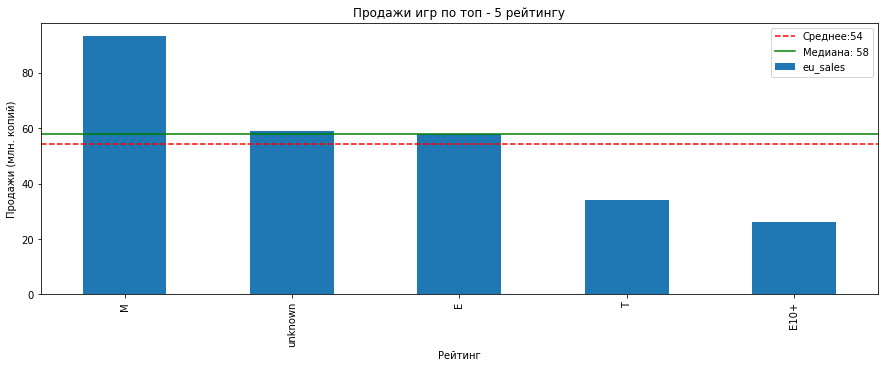

In [94]:
raiting_eu_top = raiting_eu.head(5)
raiting_eu_top.plot(kind='bar', figsize=(15,5))
plt.xlabel('Рейтинг')
plt.ylabel('Продажи (млн. копий)')
plt.title('Продажи игр по топ - 5 рейтингу')
mean_sales_raiting_eu = raiting_eu_top['eu_sales'].mean()
median_sales_raiting_eu = raiting_eu_top['eu_sales'].median()
plt.axhline(mean_sales_raiting_eu, color="r", linestyle="--", label=f"Среднее:{mean_sales_raiting_eu:.0f}")
plt.axhline(median_sales_raiting_eu, color="g", linestyle="-", label=f"Медиана: {median_sales_raiting_eu:.0f}")
plt.legend();

Самыми популярными рейтингами являются **M** ("для игроков от 17 лет"), **unknown**, **E** ("для всех"), **T** ("для подростков от 13 лет и старше") и **E10+** ("для всех от 10 лет").

***Вывод:***

* Самыми популярными платформами являются **PS4** (занимает 48% от продаж), **XOne** (17,1%), **PS3** (9,4%), **PC** (6,6%) и **3DS** (6%).

* Самыми популярными жанрами являются **Action (экшен), Shooter (стрелялки), Sports (спортивные игры), Role-Playing (ролевые игры) и Racing (гонки)**.

* Самыми популярными рейтингами являются **M** ("для игроков от 17 лет"), **unknown**, **E** ("для всех"), **T** ("для подростков от 13 лет и старше") и **E10+** ("для всех от 10 лет").

#####  Регион япония (Jp)

###### Популярные платформы

In [95]:
platforms_jp = games_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
platforms_jp = platforms_jp.sort_values(by='jp_sales', ascending=False)
display(platforms_jp)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
PSP,0.36
XOne,0.32
X360,0.08
PC,0.00


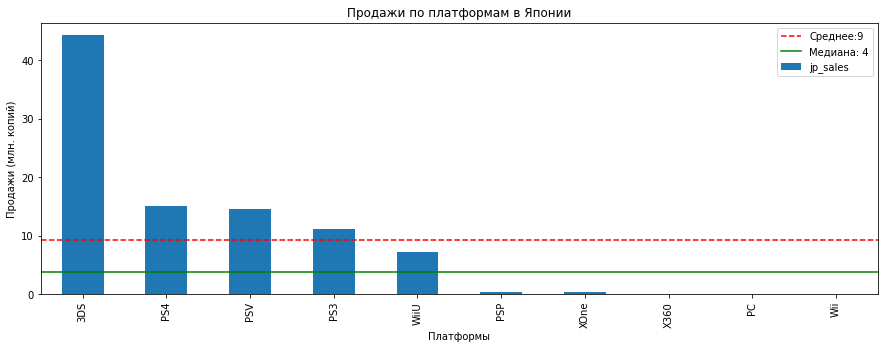

In [96]:
platforms_jp.plot(kind='bar', figsize=(15,5))
plt.xlabel('Платформы')
plt.ylabel('Продажи (млн. копий)')
plt.title('Продажи по платформам в Японии')
mean_sales_jp = platforms_jp['jp_sales'].mean()
median_sales_jp = platforms_jp['jp_sales'].median()
plt.axhline(mean_sales_jp, color="r", linestyle="--", label=f"Среднее:{mean_sales_jp:.0f}")
plt.axhline(median_sales_jp, color="g", linestyle="-", label=f"Медиана: {median_sales_jp:.0f}")
plt.legend();

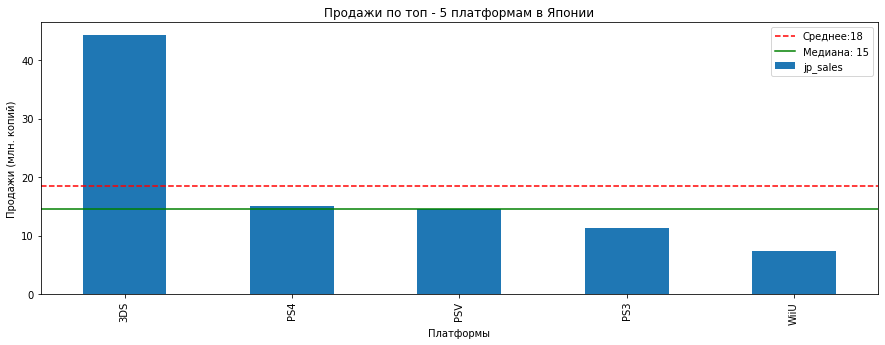

In [97]:
platforms_jp_top = platforms_jp.head(5)
platforms_jp_top.plot(kind='bar', figsize=(15,5))
plt.xlabel('Платформы')
plt.ylabel('Продажи (млн. копий)')
plt.title('Продажи по топ - 5 платформам в Японии')
mean_sales_jp = platforms_jp_top['jp_sales'].mean()
median_sales_jp = platforms_jp_top['jp_sales'].median()
plt.axhline(mean_sales_jp, color="r", linestyle="--", label=f"Среднее:{mean_sales_jp:.0f}")
plt.axhline(median_sales_jp, color="g", linestyle="-", label=f"Медиана: {median_sales_jp:.0f}")
plt.legend();

Самыми популярными платформами (топ - 5) в Японии являются **3DS**, **PS4**, **PSV**, **PS3**  и **WiiU**.

In [98]:
platforms_jp['share'] = platforms_jp['jp_sales']/platforms_jp['jp_sales'].sum()

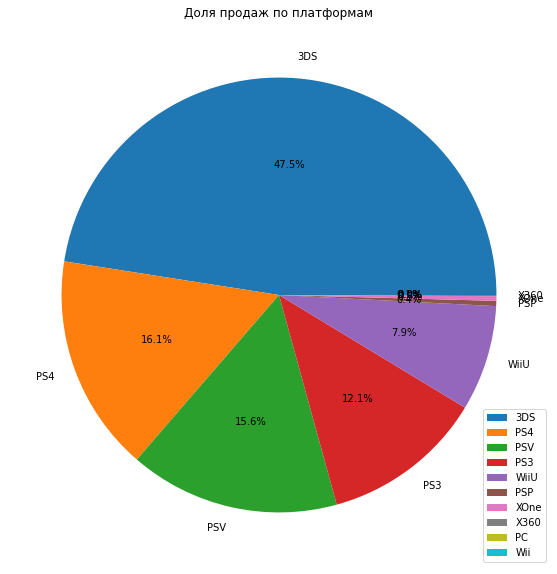

In [99]:
platforms_jp.plot(kind='pie', y='jp_sales', figsize=(10,10), autopct='%1.1f%%')
plt.title('Доля продаж по платформам')
plt.ylabel('');

Из диаграммы выше видно, что 3DS занимает 47,5% от продаж, PS4 занимает 16,1% , PSV - 15,6%, PS3 - 12,1%, , а WiiU занимает 7,9% продаж.

###### Популярные жанры

In [100]:
genres_jp = games_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
genres_jp = genres_jp.sort_values(by='jp_sales', ascending=False)
display(genres_jp)

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
Adventure,3.60
Sports,3.26
Platform,2.69
Simulation,2.31


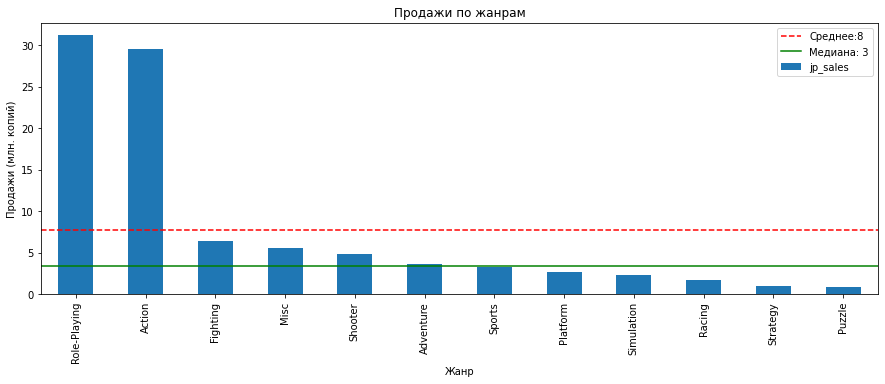

In [101]:
genres_jp.plot(kind='bar', figsize=(15,5))
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн. копий)')
plt.title('Продажи по жанрам')
mean_sales_genres_jp = genres_jp['jp_sales'].mean()
median_sales_genres_jp = genres_jp['jp_sales'].median()
plt.axhline(mean_sales_genres_jp, color="r", linestyle="--", label=f"Среднее:{mean_sales_genres_jp:.0f}")
plt.axhline(median_sales_genres_jp, color="g", linestyle="-", label=f"Медиана: {median_sales_genres_jp:.0f}")
plt.legend();

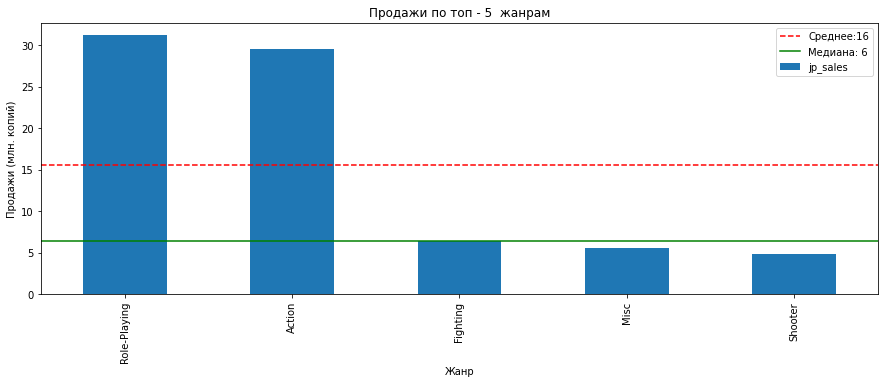

In [102]:
genres_jp_top = genres_jp.head(5)
genres_jp_top.plot(kind='bar', figsize=(15,5))
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн. копий)')
plt.title('Продажи по топ - 5  жанрам')
mean_sales_genres_jp = genres_jp_top['jp_sales'].mean()
median_sales_genres_jp = genres_jp_top['jp_sales'].median()
plt.axhline(mean_sales_genres_jp, color="r", linestyle="--", label=f"Среднее:{mean_sales_genres_jp:.0f}")
plt.axhline(median_sales_genres_jp, color="g", linestyle="-", label=f"Медиана: {median_sales_genres_jp:.0f}")
plt.legend();

Самыми популярными жанрами (Топ - 5 ) являются **Role-Playing (ролевые игры), Action (экшн), Fighting (боевые игры), Misc (прочие жанры) и Shooter (стрелялки)**.

###### Влияние рейтинга ESRB

In [103]:
raiting_jp = games_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
raiting_jp= raiting_jp.sort_values(by='jp_sales', ascending=False)
display(raiting_jp)

,jp_sales
rating,
unknown,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


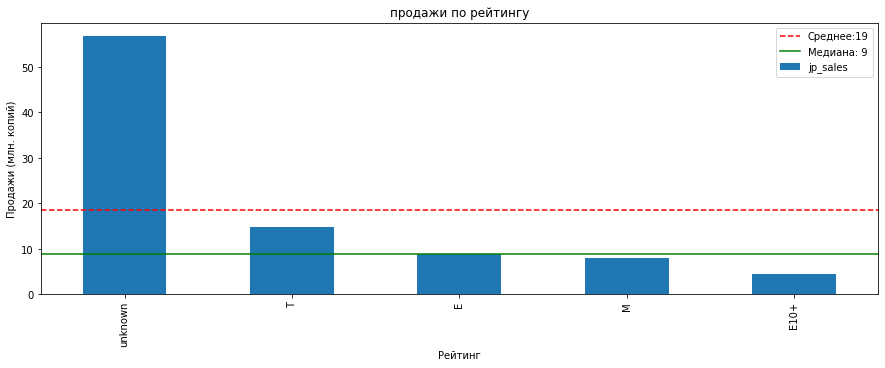

In [104]:
raiting_jp.plot(kind='bar', figsize=(15,5))
plt.xlabel('Рейтинг')
plt.ylabel('Продажи (млн. копий)')
plt.title('продажи по рейтингу')
mean_sales_raiting_jp = raiting_jp['jp_sales'].mean()
median_sales_raiting_jp = raiting_jp['jp_sales'].median()
plt.axhline(mean_sales_raiting_jp, color="r",linestyle="--", label=f"Среднее:{mean_sales_raiting_jp:.0f}")
plt.axhline(median_sales_raiting_jp, color="g", linestyle="-", label=f"Медиана: {median_sales_raiting_jp:.0f}")
plt.legend();

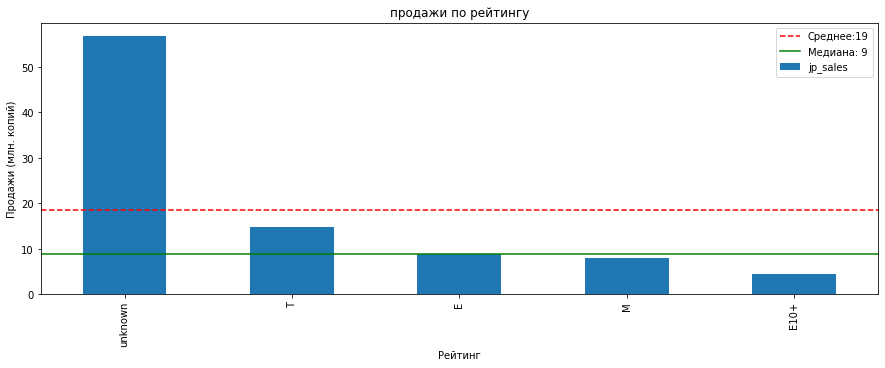

In [105]:
raiting_jp_top = raiting_jp.head(5)
raiting_jp_top.plot(kind='bar', figsize=(15,5))
plt.xlabel('Рейтинг')
plt.ylabel('Продажи (млн. копий)')
plt.title('продажи по рейтингу')
mean_sales_raiting_jp = raiting_jp_top['jp_sales'].mean()
median_sales_raiting_jp = raiting_jp_top['jp_sales'].median()
plt.axhline(mean_sales_raiting_jp, color="r",linestyle="--", label=f"Среднее:{mean_sales_raiting_jp:.0f}")
plt.axhline(median_sales_raiting_jp, color="g", linestyle="-", label=f"Медиана: {median_sales_raiting_jp:.0f}")
plt.legend();

Самыми популярными рейтингами являются игры **с неизвестным рейтингом**, далее идут игры с рейтингом **T** ("для подростков от 13 лет и старше"), **E** ("для всех"), **M** ("для игроков от 17 лет")  и **E10+** ("для всех от 10 лет").

***Вывод:***

* Самыми популярными платформами в Японии являются **3DS** (занимает 47,5% от продаж), **PS4** (16,1%), **PSV** (15%), **PS3** (12,1%),  и **WiiU** (12,1%).
* Самыми популярными жанрами являются **Role-Playing (ролевые игры), Action (экшен), Fighting (боевые игры), Misc (прочие жанры) и Shooter (стрелялки)**.

* Самыми популярными рейтингами являются игры **с неизвестным рейтингом**, далее идут игры с рейтингом **T** ("для подростков от 13 лет и старше"), **E** ("для всех"), **M** ("для игроков от 17 лет")  и **E10+** ("для всех от 10 лет").

# ***Вывод:***

Самыми популярными платформами в Северной Америке являются: **PS4**, **XOne**, **X360**, **3DS** и **PS3**. Платформа *PS4* занимает 34,7% от продаж, *XOne* занимает 28,6%, *X360* - 10%, **
3DS* - 8%, а *PS3* занимает меньше всех продаж - 7,8%. Первые две платформы занимают больше 50% от всех продаж.
Самыми популярными жанрами являются **Action (экшен), Sports (спортивные игры), Shooter (стрелялки), Misc (прочие жанры) и Role_Playing (ролевые игры)**.   
Самыми популярными рейтингами являются **M** ("для игроков от 17 лет"), **unknown**, **E** ("для всех"), **T** ("для подростков от 13 лет и старше"), **E10+** ("для всех от 10 лет") и игры **без рейтинга**.

В Европе похожая ситуация - самыми популярными платформами являются **PS4** (48%), **XOne** (17,1%), **PS3** (9,4%), **PC** (6,6%) и **3DS** (6%). Видно, что PS4 пользуется большой плпулярностью. и занимает практически половину рынка в Европе.  
С популярными жанрами в Европе тоже похожая ситуация: в топ - 5 популярных жанров входят **Action (экшен), Shooter (стрелялки), Sports (спортивные игры), Role-Playing (ролевые игры) и Racing (гонки)**. 

В Северной Америке и Европе 4 популярных жанра совпадают, а различия в пятых жанрах обусловлены разными культурными факторами. В Европе гонки более популярны, благодаря исторической связи с автоспортом, культурным традициям и любви к реалистичным, соревновательным играм, а также акценту многих гоночных игр именно на европейскую аудиторию.  

Самыми популярными рейтингами в Европе (как и в Северной Америке) являются **M** ("для игроков от 17 лет"),**unknown**, **E** ("для всех"), **T** ("для подростков от 13 лет и старше") и **E10+** ("для всех от 10 лет").  

В целом можно сказать, что ситуации с популярными платформами, жанрами и рейтингом в Северной Америке и Европе достаточно похожи.  

Немного иначе обстоит дело в Японии. Самыми популярными платформами там являются **3DS** (47,5% от продаж), **PS4** (16,1%), **PSP** (15,6%), **PS3** (12,1%), и **WiiU** (7,9%). Платформа 3DS занимает практически половину рынка в Японии.
Самыми популярными жанрами являются **Role-Playing (ролевые игры), Action (экшн), Fighting (боевые игры), Misc (прочие жанры) и Shooter (стрелялки)**. 
Популярность этих жанров обусловлена культурными и историческими факторами и особенностями игрового рынка. Именно Япония - родина многих классических ролевых игр, которые завоевали популярность во всём мире. Японские геймеры любят соревноваться, поэтому экшн игры среди них пользуются большой популярностью. Япониские разрабоотчики известны своим креативным подходом к созданию игр, и очень часто их игры не попадают ни в один жанр, поэтому такой популярностью пользуется жанр Misc. Боевые игры также пользуются популярностью из-за любви к боевым искусствам.

Самыми популярными рейтингами являются игры **с неизвестным рейтингом**, далее идут игры с рейтингом **T** ("для подростков от 13 лет и старше"), **E** ("для всех"), **M** ("для игроков от 17 лет")  и **E10+** ("для всех от 10 лет").  

По поводу неизвестного рейтинга можно предположить, что рейтинг ESRB не применяется в Японии, а там есть своя система оценки. Таким образом можно сказать, что на продажи в Японии данный рейтинг имеет не такое большое значение.

#### Шаг 5. Проверка гипотез

##### Проверка гипотезы, что средние пользовательские рейтинги платформ Xbox и PC одинаковые

Нужно проверить, что средние пользовательские рейтинги двух платформ одинаковые.

HO: средние рейтинги Xbox One и PC одинаковые;  
H1: средние рейтинги неодинаковые.

In [106]:
games_xone = games_actual.loc[games_actual['platform']== "XOne", 'user_score'].dropna()
games_pc = games_actual.loc[games_actual['platform']=="PC", 'user_score'].dropna()

In [107]:
games_xone.describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [108]:
games_pc.describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [109]:
alpha = 0.05

results = st.ttest_ind(games_xone, games_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Среднее значение пользовательского рейтинга для платформы:', round(games_xone.mean(),2))   
print('Среднее значение пользовательского рейтинга для платформы:', round(games_pc.mean(),2))

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу
Среднее значение пользовательского рейтинга для платформы: 6.59
Среднее значение пользовательского рейтинга для платформы: 6.3


По результатам теста мы не можем отвергнуть нулевую гипотезу, а значит можем предположить, что она верна, и средние пользовательские рейтинги платформ Xbox One и PC одинаковые (при уровне статистической значимости в 5%). Если сравнить средние значения, которые мы получили из таблиц, можно видеть, что у Xbox One среднее значение пользовательского рейтинга составляет 6,59, а у PC - 6,3.

##### Проверка гипотезы, что средние пользовательские рейтинги жанров Action и Sports разные

Необходимо проверить, что пользовательские рейтинги двух данных жанров - разные.  
Коэффициент статистической значимости зададим равным 5%.

H0: Средние пользовательские рейтинги жанров Action и Sports - одинаковые.  
H1: Средние пользовательские рейтинги данных жанров - неодинаковые.

In [110]:
genre_action = games_actual.loc[games_actual['genre']=="Action", 'user_score'].dropna()
genre_sports = games_actual.loc[games_actual['genre']=="Sports", 'user_score'].dropna()

In [111]:
genre_action.describe()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [112]:
genre_sports.describe()

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

In [113]:
alpha = 0.05

result = st.ttest_ind(genre_action, genre_sports,equal_var=False)

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Среднее значение пользовательского рейтинга жанра Action:', round(genre_action.mean(),2))
print('Среднее значение пользовательского рейтинга жанра Sports:', round(genre_sports.mean(),2))

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу
Среднее значение пользовательского рейтинга жанра Action: 6.76
Среднее значение пользовательского рейтинга жанра Sports: 5.23


По результатам теста мы можем отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов, и предположить, что средние пользовательские рейтинги у данных двух жанров разные (при заданном уровне статистической значимости в 5%). Методом describe() мы получили, что средний пользовательский рейтинг жанра Action равен 6,76, а средний пользовательский рейтинг жанра Sports равен 5,23.

# ***Вывод:***

Были проверены 2 гипотезы: 
1. средние пользовательские рейтинги платформ Xbox и PC - одинаковые;
2. средние пользовательские рейтинги жанров Action и Sports различаются.

По итогам проведённых тестов в первом случае нам не удалось отвергнуть нулевую гипотезу, а во втором случае мы отвергаем нулевую гипотезу (о равенстве) и принимаем альтернативную. По результатам проверки первой гипотезы мы можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC равны между собой (или близки по значению) - (это подтверждает и метод describe). По результатам проверки второй гипотезы мы также можем сказать, что средние пользовательские рейтинги для жанров Action и Sports не равны между собой. 

Нулевая гипотеза формируется на предположении о том, что две выборки равны между собой. В наших примерах это означает, что средние пользовательские рейтинги для двух заданных платформ (в первом случае), и для двух заданных жанров (во втором случае) - одинаковые.  
Альтернативная гипотеза строится на предположении, что нулевая гипотеза не . Алтернативная гипотеза может быть двусторонней и односторонной. Двустороннюю мы применяем, когда нужно проверить неравенство, а одностороняя применяется для проверки, что одна выборка больше или меньше другой. В нашем случае, нам не нужно было сравнивать средние рейтинги (какой брльше, какой меньше), а было достаточно просто проверить равенство и неравенство. Поэтому в обоих случаях была использована двусторонняя проверка.   
Для сравнивания двух независимых выборок в Python применяется метод ttest_ind(). В качестве аргументов методу передаются обе выборки, которые нужно сравнить, и, если дисперсии у них разные, дополнительно передается ещё один аргумент - equal_var=False. Метод возвращает значение, которое потом сравнивается с заданным уровнем статистической значимости.

#### Шаг 6. Общий вывод:

Для проекта был проведён анализ данных интернет-магазина "Стримчик", который продаёт игры, а также проверены требуемые гипотезы.

1. В начале была изучена общая информация о датафрейме, произведена проверка на отсутствующие значения и дубликаты, проверены типы данных.  

* В датафрейме 16 715 строк и 11 столбцов. В столбцах 'Name', ''Year_of_Release', 'Genre', 'Critic_score', 'User_score' и 'Raiting' присутствуют пропущенные данные. В некоторых столбцах неправильный тип данных. Названия столбцов не соответствуют змеиному регистру. Явных дубликатов в датафрейме не обнаружено. Неявные будликаты были удалены из датафрейма. После удаления дубликатов осталось 16713 строк. Данные представлены за период с 1980 по 2016 год.

2. Была проведена предобработка - работа с ошибками, пропусками и дубликатами (явными и неявными) в данных.

* Были переименованы столбцы (приведены к змеиному регистру);
* Были обработаны пропущенные значения в столбцах: 
   - в столбцах *'name', 'genre'* и *'raiting'* пропущенные значения были заменены на 'unknown';
   - в столбцах *'year_of_release', 'critic_score'* и *'user_score'* пропуски были оставлены без изменений, так как нет способа для корректного заполнения данных для этих столбцов. Поскольку в этих столбцах представлены данные о годах и рейтинге, будет неправильно заполнять пропуски средним или медианой. Удалить строки с пропущенными значениями тоже будет некорректно, так как такие строки составляют большую часть от общего количества строк, и таким образом мы потеряем большое количество данных.
* Данные в столбце 'year_of_release' переведены в тип Int64, а данные в столбце 'user_score' в тип float.
* Добавлен столбец с общими продажами по всем регионам.

3. Был произведён исследовальский анализ данных, в результате которого удалось установить, что:  

* количество выпускаемых игр начиннает расти с 1994 года (с выхода Sony PlayStation) и достигает своего пика примерно в 2008 году. Далее следует резкий спад выпуска игр, и выпуск игр начинает выравниваться только к 2012 году. Далее количество выпускаемых игр меняется не так сильно (то немного возрастает, то снова уменьшается). Резкий спад в 2011 году можно объяснить тем, что многие игровые платформы, которые доминировали на рынке в предыдущие годы уже находились на стадии заката и игр для них выпускали всё меньше (компании переключились на разработку игр для новых платформ).
С выходом новых платформ объём выпускаемых игр начал стабилизироваться, но он не доходит до значений предыдущих лет. Это может быть связано с тем, что в 2012 - 2016 годах проходила смена поколений платформ, и разработчики только осваивали возможности новых платформ. Также, с появление новых более мощных платформ увеличились затраты на выпуск игр для них, из-за чего, соответственно снизилось количество выпускаемых игр. Ещё одним фактором снижения количества игр могло стать появление в 2012 году игр для мобильных платформ. Однако, игры для новых платформ получили улучшенные технологии и их количество переросло в качество.

Данные до 1994 года не так важны для анализа, так как в это время было выпущено очень мало игр. Плюс, рейтинг ESRB тоже появился только в 1994 году, а значит данных по нему до этого года - нет, и для данных до этого года нельзя будет провести полноценный анализ.

* Средняя "продолжительность жизни" платформы составляет примерно 10 лет. И, примерно раз в 5 лет, появляются новые платформы. Сейчас все актупальные платформы находятся на стадии спада, или близки к ней.


* С учётом того, что жизненный цикл платформы составляет 10 лет, а для составления капании на 2017 год нам для анализа нужно выбрать платформы, которые находятся в фазе зрелости и популярности, я думаю, что нужно рассматривать платформы, которые выпускались с 2007 года. Также стоит учесть, что платформы, которые были популярны за пару лет до 2007 года, тоже стоит включить в анализ, так как они всё равно ещё могли сохранить определённую долю рынка. Поэтому актуальный период для составления рекламной кампании был выбран с **2014** до **2016** года.  


* По общим продажам за актуальный период своими значениями выделяются 3 платформы: **PS4, , XOne** и **3DS**.  


* К 2016 году практически все платформы находятся на этапе спада, и можно наблюдать падение продаж. Из всех платформ только 3DS показывает небольшой рост в продажах (с 0,323 млн. копий до 0,329 млн. копий). Также перспективными, несмотря на спад продаж, можно считать платформы PS4 и XOne, которые появились в 2013 году и находятся на стадии зрелости.  


* Многие платформы имеют медиану отличную от среднего значения. У платформ DC, PC, PSP, PSV медиана гораздо ниже средней медианы, а у платформ PS4,Wii, WiiU, X360 и XOne медиана, наоборот, намного выше среднего значения.
Третьи квартили у этих платформ находятся намного выше, чем у других платформ. Это может указывать на то, что эти платформы пользовались большей популярностью, чем остальные, и то, что на эти платформы было выпущено больше игр.  


* С учётом низкого коэффициента корреляции для отзывов критиков и продаж, можно сказать, что отзывы критиков слабо влияют на объёмы продаж игр, то есть выскокие оценки критиков не означают, что продажи будут значительно увеличиваться (и наоборот). Также нельзя сказать и о наличии линейной зависимости между отзывами пользователей и уровнем продаж, и можно сказать, что отзывы пользователей не оказывают на продажи практически никакого влияния.


* Самыми популярными жанрами являются Action (экшн), Sports (спортивные игры) и Shooter (стрелялки). Продажи по ним превышают и среднее, и медианное значение. У жанра Shooter медиана и третий квартиль находится намного выше остальных жанров. Это может указывать на то, что этот жанр пользовался большей популярностью, чем остальные, и то, что игр данного жанра было выпущено больше.

4. Далее были составлены портреты пользователей для каждого региона (Северная Америка, Европа и Япония).  

* Были рассмотрены:  

    - самые популярные платформы;
    - самые популярные жанры;
    - влияние рейтинга ESRB на продажи в отдельном регионе.

На основании проделанной работы были сделаны следующие выводы:


* Самыми популярными платформами в Северной Америке являются: **PS4, XOne, X360, 3DS ** и **PS3**. Платформа *PS4* занимает 34,7% от продаж, *XOne* занимает 28,6%, *X360* - 10%, *3DS* - 8%, а *PS3* занимает меньше всех продаж - 7,8%.  

* Самыми популярными жанрами являются **Action** (экшен), **Sports** (спортивные игры), **Shooter** (стрелялки), **Misc** (прочие жанры) и **Role-Playing** (ролевые игры).  
* Самыми популярными рейтингами являются **M** ("для игроков от 17 лет"), **unknown**, **E** ("для всех"), **T** ("для подростков от 13 лет и старше") и **E10+** ("для всех от 10 лет").


* В Европе наблюдается похожая ситуация - самыми популярными платформами являются **PS4** (48%), **XOne** (17,1%), **PS3** (9,4%), **PC** (6,6%) и **3DS** (6%).  
* С популярными жанрами в Европе тоже похожая ситуация: в топ - 5 популярных жанров входят **Action** (экшен), **Shooter** (стрелялки), **Sports** (спортивные игры), **Role-Playing** (ролевые игры) и **Racing** (гонки).   
В Северной Америке и Европе 4 популярных жанра совпадают, а различия в пятых жанрах обусловлены разными культурными факторами. В Европе гонки пользуются большей популярностью благодаря исторической связи с автоспортом, культурным традициям и любви к реалистичным, соревновательным играм, а также акценту многих гоночных игр именно на европейскую аудиторию.

* Самыми популярными рейтингами являются **M** ("для игроков от 17 лет"), **unknown**, **E** ("для всех"), **T** ("для подростков от 13 лет и старше"), игры **без рейтинга** и **E10+** ("для всех от 10 лет"). Популярные жанры совпадают с жанрами в Северной Америке.  


В целом можно сказать, что ситуации с популярными платформами, жанрами и рейтингом в Северной Америке и Европе достаточно похожи.  


* Немного иначе обстоит дело в Японии. Самыми популярными платформами там являются **3D, PS4, PSV, PS3 и WiiU**. Самыми популярными жанрами являются **Role-Playing** (ролевые игры), **Action** (экшн), **Fighting** (боевые игры), **Misc** (прочие жанры) и **Shooter** (стрелялки).  
Популярность этих жанров обусловлена культурными и историческими факторами и особенностями игрового рынка. Именно Япония - родина многих классических ролевых игр, которые завоевали популярность во всём мире. Японские геймеры любят соревноваться, поэтому экшн игры среди них пользуются большой популярностью. Япониские разрабоотчики известны своим креативным подходом к созданию игр, и очень часто их игры не попадают ни в один жанр, поэтому такой популярностью пользуется жанр Misc. Боевые игры также пользуются популярностью из-за любви к боевым искусствам.  

* Самыми популярными рейтингами являются игры **с неизвестным рейтингом**, далее идут игры с рейтингом **T** ("для подростков от 13 лет и старше"), **E** ("для всех"), **M** ("для игроков от 17 лет")  и **E10+** ("для всех от 10 лет").  

По поводу неизвестного рейтинга можно предположить, что рейтинг ESRB не применяется в Японии, а там есть своя система оценки. Таким образом можно сказать, что на продажи в Японии данный рейтинг имеет не такое большое значение.  


В целом можно сказать, что игровые предпочтения в Северной Америке и в Европе достаточно похожи. Есть небольшие отличия в предпочитаемых платформах и жанрах, но эти отличия незначительные. А игровые предпочтения в японии заметно отличаются и от Северной Америки, и от Европы. Это обусловлено культурой, историей развития видеоигр и в восприятии жанров. 
В Японии предпочитают глубокие сюжетные игры, экшн игры и платформеры для всей семьи, тогда как В Северной Америке и Европе популярны экшены и стрелялки, а также спортивные игры (например, FIFA в Европе).

5. Далее были проверены 2 гипотезы: 
*  средние пользовательские рейтинги платформ Xbox и PC - одинаковые;
*  средние пользовательские рейтинги жанров Action и Sports различаются.

По итогам проведённых тестов при уровне статистической значимости в 5%, в первом случае нам не удалось отвергнуть нулевую гипотезу, а во втором случае мы отвергаем нулевую гипотезу (о равенстве) и принимаем альтернативную. По результатам проверки первой гипотезы мы можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC равны между собой (или близки по значению) - (это подтверждает и метод describe). По результатам проверки второй гипотезы мы также можем сказать, что средние пользовательские рейтинги для жанров Action и Sports не равны между собой. 


В целом можно сказать, что успешность игры зависит от актуальности платформы, от жанра и от региона, в котором в игру играют.  

Для планирования капмании на 2017 год интернет- магазину нужно обратить внимание на перспективные платформы (3DS, PS4, XOne). Жанрами, на которые стоит обратить внимание, являются Action, Sports и Shooter.  
Стоит также принимать во внимание региональные различия пользователей:
    - для пользователей из Северной Америки и Европы будут актуальны игры в жанрах Action, Sports и Shooter, с рейтингом "E" и "M";
    - для пользователей из Японии будут актуальны игры в жанре Role-Playing, Action и Fighting, с рейтингом "T".